In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing the data sets :

In [3]:
cust_data = pd.read_excel('C:/Users/ashis/OneDrive/Documents/Data Science 360 Assignment/Machine learning/Case Study - 4/CustomersData.xlsx')

disc_coup = pd.read_csv('C:/Users/ashis/OneDrive/Documents/Data Science 360 Assignment/Machine learning/Case Study - 4/Discount_Coupon.csv')

mark_spend = pd.read_csv('C:/Users/ashis/OneDrive/Documents/Data Science 360 Assignment/Machine learning/Case Study - 4/Marketing_Spend.csv')

online_sales = pd.read_csv('C:/Users/ashis/OneDrive/Documents/Data Science 360 Assignment/Machine learning/Case Study - 4/Online_Sales.csv')

tax_amt = pd.read_excel('C:/Users/ashis/OneDrive/Documents/Data Science 360 Assignment/Machine learning/Case Study - 4/Tax_amount.xlsx')

In [4]:
# Data preperation :

In [5]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     1468 non-null   int64 
 1   Gender         1468 non-null   object
 2   Location       1468 non-null   object
 3   Tenure_Months  1468 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.0+ KB


In [6]:
cust_data.columns

Index(['CustomerID', 'Gender', 'Location', 'Tenure_Months'], dtype='object')

In [7]:
#pd.get_dummies(cust_data,columns=['Gender','Location'],drop_first=True)
# This we will done when we building ML model.

In [8]:
disc_coup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Month              204 non-null    object
 1   Product_Category   204 non-null    object
 2   Coupon_Code        204 non-null    object
 3   Discount_pct       204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [9]:
disc_coup.columns = disc_coup.columns.str.replace(' ','')

In [10]:
disc_coup.columns

Index(['Month', 'Product_Category', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [11]:
#pd.get_dummies(disc_coup, columns = ['Coupon_Code','Discount_pct'],drop_first=True)

In [12]:
mark_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [13]:
mark_spend['Date']=pd.to_datetime(mark_spend.Date)

In [14]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  int64  
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 4.0+ MB


In [15]:
online_sales.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status'],
      dtype='object')

In [16]:
tax_amt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Category  20 non-null     object 
 1   GST               20 non-null     float64
dtypes: float64(1), object(1)
memory usage: 448.0+ bytes


In [17]:
tax_amt.columns

Index(['Product_Category', 'GST'], dtype='object')

### Q1)  Calculate the Invoice amount for each transaction and item level :

Invoice value = ( (Quantity * Avg_Price)*(1-Discount_pct)*(1+GST) )+Delivery_Charges

In [18]:
#online_sales.head(2)

In [19]:
online_sales.Transaction_ID.nunique()

25061

In [20]:
# online_sales.loc[ online_sales.Transaction_ID ==32526  , :]

In [21]:
OSDC = pd.merge( left = online_sales ,right = disc_coup , how = 'inner', on = 'Product_Category'  )

In [22]:
OSDC.shape

(630288, 13)

In [23]:
OSDC.drop_duplicates()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,14410,48492,20191231,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.5,Clicked,Aug,NE20,20
630284,14410,48492,20191231,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.5,Clicked,Sep,NE30,30
630285,14410,48492,20191231,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.5,Clicked,Oct,NE10,10
630286,14410,48492,20191231,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.5,Clicked,Nov,NE20,20


In [24]:
# Need to drop duplicate in merge dataframe .

In [25]:
disc_coup.columns

Index(['Month', 'Product_Category', 'Coupon_Code', 'Discount_pct'], dtype='object')

In [26]:
OSDC_TaxAmt = pd.merge( left = OSDC ,right = tax_amt , how = 'inner', on = 'Product_Category'  )

In [27]:
OSDC_TaxAmt.shape

(630288, 14)

In [28]:
OSDC_TaxAmt

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10,0.10
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20,0.10
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30,0.10
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10,0.10
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,14410,48492,20191231,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.5,Clicked,Aug,NE20,20,0.05
630284,14410,48492,20191231,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.5,Clicked,Sep,NE30,30,0.05
630285,14410,48492,20191231,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.5,Clicked,Oct,NE10,10,0.05
630286,14410,48492,20191231,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.5,Clicked,Nov,NE20,20,0.05


In [29]:
# Invoice value = ( (Quantity * Avg_Price)*(1-Discount_pct)*(1+GST) )+Delivery_Charges

(OSDC_TaxAmt.Quantity * OSDC_TaxAmt.Avg_Price)*(1-(OSDC_TaxAmt.Discount_pct/100))*(1 + OSDC_TaxAmt.GST) + OSDC_TaxAmt.Delivery_Charges

0         158.67290
1         141.76480
2         124.85670
3         158.67290
4         141.76480
            ...    
630283    260.79320
630284    229.00655
630285    292.57985
630286    260.79320
630287    229.00655
Length: 630288, dtype: float64

In [30]:
# Someone used coupon or someone not :
OSDC_TaxAmt.loc [ : , 'Revenue'] = pd.Series( 
    np.where(OSDC_TaxAmt.Coupon_Status == 'Used' , 
    (OSDC_TaxAmt.Quantity * OSDC_TaxAmt.Avg_Price)*(1-(OSDC_TaxAmt.Discount_pct/100))*(1 + OSDC_TaxAmt.GST) + OSDC_TaxAmt.Delivery_Charges ,
        ((OSDC_TaxAmt.Quantity * OSDC_TaxAmt.Avg_Price)*(1 + OSDC_TaxAmt.GST) + OSDC_TaxAmt.Delivery_Charges)) )

In [31]:
OSDC_TaxAmt

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Revenue
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Jan,ELEC10,10,0.10,158.6729
1,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Feb,ELEC20,20,0.10,141.7648
2,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Mar,ELEC30,30,0.10,124.8567
3,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,Apr,ELEC10,10,0.10,158.6729
4,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,May,ELEC20,20,0.10,141.7648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,14410,48492,20191231,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.5,Clicked,Aug,NE20,20,0.05,324.3665
630284,14410,48492,20191231,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.5,Clicked,Sep,NE30,30,0.05,324.3665
630285,14410,48492,20191231,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.5,Clicked,Oct,NE10,10,0.05,324.3665
630286,14410,48492,20191231,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.5,Clicked,Nov,NE20,20,0.05,324.3665


In [32]:
## At each Transaction_ID level 
OSDC_TaxAmt.groupby('Transaction_ID').Revenue.sum().sort_values(ascending =False)

Transaction_ID
24863    262220.20800
24860    240051.43968
20374    220486.62528
25832    214862.76624
33036    182499.25920
             ...     
43354        78.60000
45053        78.60000
45271        77.38560
47060        77.38560
43581        77.28000
Name: Revenue, Length: 25000, dtype: float64

In [33]:
## At each item level 
OSDC_TaxAmt.groupby('Product_Category').Revenue.sum().sort_values(ascending =False)

Product_Category
Nest-USA                3.265126e+07
Apparel                 9.942748e+06
Nest                    6.297531e+06
Office                  4.580343e+06
Drinkware               3.265697e+06
Bags                    2.323432e+06
Lifestyle               1.495555e+06
Notebooks & Journals    1.458925e+06
Nest-Canada             9.149739e+05
Headgear                6.808571e+05
Gift Cards              2.272286e+05
Waze                    1.478953e+05
Bottles                 1.221198e+05
Accessories             1.211570e+05
Housewares              8.440422e+04
Android                 1.336886e+04
Name: Revenue, dtype: float64

### Perform Exploratory Analysis :

##### 1) Understanding how many customers acquired every month 

In [34]:
Cust_osdc_tax_amt = pd.merge(OSDC_TaxAmt , cust_data , on = 'CustomerID')

In [35]:
Cust_osdc_tax_amt.loc[ : , 'Transaction_Date'] =  pd.to_datetime(Cust_osdc_tax_amt['Transaction_Date'], format='%Y%m%d')

In [36]:
Cust_osdc_tax_amt.loc[ : , ['CustomerID','Transaction_Date']]

,CustomerID,Transaction_Date
0,17850,2019-01-01
1,17850,2019-01-01
2,17850,2019-01-01
3,17850,2019-01-01
4,17850,2019-01-01
...,...,...
630283,16333,2019-12-16
630284,16333,2019-12-16
630285,16333,2019-12-16
630286,16333,2019-12-16


In [37]:
Cust_osdc_tax_amt.Transaction_Date.min()

Timestamp('2019-01-01 00:00:00')

In [38]:
Cust_osdc_tax_amt['day']  = Cust_osdc_tax_amt.Transaction_Date.dt.day
Cust_osdc_tax_amt['Month'] = Cust_osdc_tax_amt.Transaction_Date.dt.month
Cust_osdc_tax_amt ['quarter'] = pd.cut( Cust_osdc_tax_amt.Month, np.arange(0, 13, 3) )

In [39]:
Cust_osdc_tax_amt.CustomerID.value_counts()

12748    8184
15311    6996
14606    6840
17841    6804
14911    6204
         ... 
18113      12
17633      12
16424      12
17870      12
13953      12
Name: CustomerID, Length: 1468, dtype: int64

In [40]:
A = pd.DataFrame(Cust_osdc_tax_amt.groupby('CustomerID').Transaction_Date.min())

In [41]:
A

,Transaction_Date
CustomerID,
12346,2019-09-15
12347,2019-03-24
12348,2019-06-22
12350,2019-12-14
12356,2019-09-15
...,...
18259,2019-04-05
18260,2019-06-22
18269,2019-04-05


In [42]:
A['Month']= A.Transaction_Date.dt.month

In [43]:
A = A.reset_index()

In [44]:
A

,CustomerID,Transaction_Date,Month
0,12346,2019-09-15,9
1,12347,2019-03-24,3
2,12348,2019-06-22,6
3,12350,2019-12-14,12
4,12356,2019-09-15,9
...,...,...,...
1463,18259,2019-04-05,4
1464,18260,2019-06-22,6
1465,18269,2019-04-05,4
1466,18277,2019-10-23,10


In [45]:
(A.groupby('Month').CustomerID.count())
# Final_Answer .. 

Month
1     215
2      96
3     177
4     163
5     112
6     137
7      93
8     136
9      78
10     87
11     68
12    106
Name: CustomerID, dtype: int64

In [46]:
Cust_osdc_tax_amt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630288 entries, 0 to 630287
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   CustomerID           630288 non-null  int64         
 1   Transaction_ID       630288 non-null  int64         
 2   Transaction_Date     630288 non-null  datetime64[ns]
 3   Product_SKU          630288 non-null  object        
 4   Product_Description  630288 non-null  object        
 5   Product_Category     630288 non-null  object        
 6   Quantity             630288 non-null  int64         
 7   Avg_Price            630288 non-null  float64       
 8   Delivery_Charges     630288 non-null  float64       
 9   Coupon_Status        630288 non-null  object        
 10  Month                630288 non-null  int64         
 11  Coupon_Code          630288 non-null  object        
 12  Discount_pct         630288 non-null  int64         
 13  GST           

#### 2) Understanding the retention of customers on month on month basis 

In [47]:
Cust_osdc_tax_amt

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Revenue,Gender,Location,Tenure_Months,day,quarter
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10,0.10,158.6729,M,Chicago,12,1,"(0, 3]"
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC20,20,0.10,141.7648,M,Chicago,12,1,"(0, 3]"
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC30,30,0.10,124.8567,M,Chicago,12,1,"(0, 3]"
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10,0.10,158.6729,M,Chicago,12,1,"(0, 3]"
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC20,20,0.10,141.7648,M,Chicago,12,1,"(0, 3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,12,NE20,20,0.05,268.7375,F,New York,41,16,"(9, 12]"
630284,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,12,NE30,30,0.05,268.7375,F,New York,41,16,"(9, 12]"
630285,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,12,NE10,10,0.05,268.7375,F,New York,41,16,"(9, 12]"
630286,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,12,NE20,20,0.05,268.7375,F,New York,41,16,"(9, 12]"


In [48]:
Ab =pd.merge( Cust_osdc_tax_amt.loc[ : ,['CustomerID','Transaction_ID','Transaction_Date','Month']] , A ,how='left' ,on ='CustomerID')

In [49]:
Ab

,CustomerID,Transaction_ID,Transaction_Date_x,Month_x,Transaction_Date_y,Month_y
0,17850,16679,2019-01-01,1,2019-01-01,1
1,17850,16679,2019-01-01,1,2019-01-01,1
2,17850,16679,2019-01-01,1,2019-01-01,1
3,17850,16679,2019-01-01,1,2019-01-01,1
4,17850,16679,2019-01-01,1,2019-01-01,1
...,...,...,...,...,...,...
630283,16333,47144,2019-12-16,12,2019-12-16,12
630284,16333,47144,2019-12-16,12,2019-12-16,12
630285,16333,47144,2019-12-16,12,2019-12-16,12
630286,16333,47144,2019-12-16,12,2019-12-16,12


In [50]:
Ab.drop(columns='Transaction_Date_y',inplace=True)

In [51]:
Ab.rename(columns={'Month_x':'Month' , 'Month_y':'first_Month'} , inplace =True)

In [52]:
Ab

,CustomerID,Transaction_ID,Transaction_Date_x,Month,first_Month
0,17850,16679,2019-01-01,1,1
1,17850,16679,2019-01-01,1,1
2,17850,16679,2019-01-01,1,1
3,17850,16679,2019-01-01,1,1
4,17850,16679,2019-01-01,1,1
...,...,...,...,...,...
630283,16333,47144,2019-12-16,12,12
630284,16333,47144,2019-12-16,12,12
630285,16333,47144,2019-12-16,12,12
630286,16333,47144,2019-12-16,12,12


In [53]:
Ab.drop_duplicates(inplace=True)

In [54]:
# Final Answer :
Ab.pivot_table( index = 'Month', columns = 'first_Month', values = 'CustomerID', aggfunc = 'count' )

first_Month,1,2,3,4,5,6,7,8,9,10,11,12
Month,,,,,,,,,,,,
1,2225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,218.0,1494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,294.0,60.0,1757.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,359.0,85.0,167.0,1345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,216.0,157.0,237.0,123.0,1411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,363.0,145.0,169.0,127.0,57.0,1223.0,NaN,NaN,NaN,NaN,NaN,NaN
7,411.0,274.0,267.0,188.0,89.0,88.0,946.0,NaN,NaN,NaN,NaN,NaN
8,342.0,162.0,354.0,127.0,106.0,93.0,110.0,1343.0,NaN,NaN,NaN,NaN
9,244.0,221.0,273.0,166.0,92.0,104.0,33.0,60.0,859.0,NaN,NaN,NaN


#### 3) How the discounts playing role in the revenues 

In [55]:
Cust_osdc_tax_amt.loc[ : , ['Month','Discount_pct','Revenue']].groupby(['Month','Discount_pct']).sum()

Revenue
Month Discount_pct              
1     10            1.961178e+06
      20            1.903481e+06
      30            1.845784e+06
2     10            1.529792e+06
      20            1.486385e+06
      30            1.442977e+06
3     10            1.738566e+06
      20            1.687836e+06
      30            1.637106e+06
4     10            1.885895e+06
      20            1.825651e+06
      30            1.765406e+06
5     10            1.485077e+06
      20            1.442711e+06
      30            1.400344e+06
6     10            1.529188e+06
      20            1.481184e+06
      30            1.433180e+06
7     10            1.790721e+06
      20            1.737079e+06
      30            1.683436e+06
8     10            1.955621e+06
      20            1.893342e+06
      30            1.831062e+06
9     10            1.699887e+06
      20            1.640804e+06
      30            1.581721e+06
10    10            1.915476e+06
      20            1.856035e+06
      30            1.796593e+06
11    10            2.267298e+06
      20            2.189473e+06
      30            2.111647e+06
12    10            2.372589e+06
      20            2.298519e+06
      30            2.224449e+06

In [56]:
Cust_osdc_tax_amt.pivot_table(index=  'Month' , columns = 'Discount_pct' , values = 'Revenue' ,aggfunc='sum')

Discount_pct,10,20,30
Month,,,
1,1.961178e+06,1.903481e+06,1.845784e+06
2,1.529792e+06,1.486385e+06,1.442977e+06
3,1.738566e+06,1.687836e+06,1.637106e+06
4,1.885895e+06,1.825651e+06,1.765406e+06
5,1.485077e+06,1.442711e+06,1.400344e+06
6,1.529188e+06,1.481184e+06,1.433180e+06
7,1.790721e+06,1.737079e+06,1.683436e+06
8,1.955621e+06,1.893342e+06,1.831062e+06
9,1.699887e+06,1.640804e+06,1.581721e+06


<AxesSubplot:xlabel='Month'>

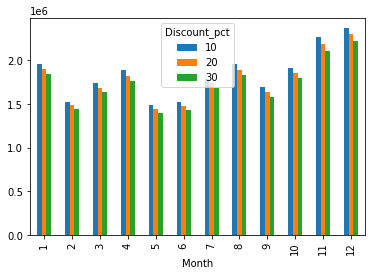

In [57]:
Cust_osdc_tax_amt.pivot_table(index=  'Month' , columns = 'Discount_pct' , values = 'Revenue' ,aggfunc='sum').plot(kind='bar')

In [58]:
Cust_osdc_tax_amt.pivot_table(index=  'Product_Category' , columns = 'Discount_pct' , values = 'Revenue' ,aggfunc='sum')

Discount_pct,10,20,30
Product_Category,,,
Accessories,4.181832e+04,4.038568e+04,3.895305e+04
Android,4.525790e+03,4.456287e+03,4.386785e+03
Apparel,3.405958e+06,3.314249e+06,3.222541e+06
Bags,7.956308e+05,7.744774e+05,7.533239e+05
Bottles,4.190291e+04,4.070661e+04,3.951031e+04
Drinkware,1.118210e+06,1.088566e+06,1.058921e+06
Gift Cards,7.889245e+04,7.574286e+04,7.259327e+04
Headgear,2.406933e+05,2.269524e+05,2.132115e+05
Housewares,2.856899e+04,2.813474e+04,2.770049e+04


#### 4) How the revenues from existing/ New customer on month on month basis 

In [59]:
Ab =pd.merge( Cust_osdc_tax_amt.loc[ : ,['CustomerID','Revenue','Transaction_Date','Month']] , A ,how='left' ,on ='CustomerID')

In [60]:
Ab.drop(columns='Transaction_Date_y',inplace=True)

In [61]:
Ab.rename(columns={'Month_x':'Month' , 'Month_y':'first_Month'} , inplace =True)

In [62]:
Ab.drop_duplicates(inplace=True)

In [63]:
# Revenue for all customer :
# Diagonally is for New customer & other than it's for exsisting customer .
Ab.pivot_table( index = 'Month', columns = 'first_Month', values = 'Revenue', aggfunc = 'sum' )

first_Month,1,2,3,4,5,6,7,8,9,10,11,12
Month,,,,,,,,,,,,
1,588355.20868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60089.26928,402092.80588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,81496.10002,14600.99318,469576.97692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,177746.14660,22064.63858,59169.87760,372685.78490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,48082.44564,35448.72866,57033.59322,34642.13672,296985.01818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,92581.15956,41044.75642,53590.13370,26132.48370,11101.33248,295557.03552,NaN,NaN,NaN,NaN,NaN,NaN
7,137874.47200,63130.07626,74877.11362,45186.26730,21037.71462,19967.93210,227700.97676,NaN,NaN,NaN,NaN,NaN
8,81813.42536,41444.12338,122405.77638,50028.54360,24347.88850,24111.91196,21583.35206,316961.97954,NaN,NaN,NaN,NaN
9,69779.24786,70644.06880,77601.34112,47171.94552,28249.78128,23182.01154,10506.30648,16210.26624,239453.04624,NaN,NaN,NaN


#### 5) Analyse KPI's like Revenue, number of orders , average order value , number of customer(existing / new), quantity, by category ,by month , by week ,by day etc ...

In [64]:
Cust_osdc_tax_amt.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Revenue', 'Gender', 'Location', 'Tenure_Months',
       'day', 'quarter'],
      dtype='object')

In [65]:
Cust_osdc_tax_amt.groupby('Month')[['Revenue', 'Product_Category','Quantity','Avg_Price']].agg( {'Revenue': ['sum', 'mean', 'min', 'max'], 
        'Quantity': ['sum', 'mean', 'min', 'max'] ,'Avg_Price':['sum', 'mean', 'min', 'max'], 'Product_Category':['count'] })

Revenue                                 Quantity                \
                sum        mean     min         max      sum      mean min   
Month                                                                        
1      5.710444e+06  118.287427  3.5805  2032.98000   239844  4.968183   1   
2      4.459154e+06  114.513453  7.4240  3539.42000   196920  5.057011   1   
3      5.063508e+06   98.358737  7.2700  3272.26000   246516  4.788578   1   
4      5.476952e+06  111.374491  6.6083  8979.27500   299064  6.081503   1   
5      4.328132e+06   79.866629  6.7623  1480.41000   222228  4.100753   1   
6      4.443552e+06   89.034868  6.6083  2950.10000   257784  5.165184   1   
7      5.211236e+06   83.577687  6.7623  4727.85000   271356  4.352002   1   
8      5.680026e+06   77.443632  6.6083  9940.20855   328548  4.479548   1   
9      4.922412e+06   95.998362  6.8690  1710.09700   231948  4.523520   1   
10     5.568104e+06  111.728551  6.3080  1798.28600   208800  4.189742   1   
11     6.568418e+06  138.329080  6.3080  1810.25000   181392  3.820066   1   
12     6.895558e+06  127.638789  6.3927  2715.19890   152004  2.813638   1   

               Avg_Price                          Product_Category  
       max           sum       mean   min     max            count  
Month                                                               
1      516  3.002280e+06  62.189908  0.79  256.88            48276  
2      600  2.083536e+06  53.506320  0.79  249.00            38940  
3      300  2.333514e+06  45.328564  0.79  250.00            51480  
4      750  2.107582e+06  42.857943  0.79  250.00            49176  
5      200  2.125652e+06  39.224457  0.79  199.00            54192  
6      825  2.215201e+06  44.385691  0.79  199.00            49908  
7      500  2.386604e+06  38.276305  0.79  199.00            62352  
8      791  2.549791e+06  34.764827  0.79  249.00            73344  
9      350  2.567047e+06  50.063333  0.79  349.00            51276  
10     900  3.227298e+06  64.758375  0.40  349.00            49836  
11     475  4.083742e+06  86.002477  0.40  349.00            47484  
12     523  4.363177e+06  80.763678  0.39  355.74            54024

In [66]:
Cust_osdc_tax_amt.groupby('quarter')[['Revenue', 'Product_Category','Quantity','Avg_Price']].agg( {'Revenue': ['sum', 'mean', 'min', 'max'], 
        'Quantity': ['sum', 'mean', 'min', 'max'] ,'Avg_Price':['sum', 'mean', 'min', 'max'], 'Product_Category':['count'] })

Revenue                                 Quantity                \
                  sum        mean     min         max      sum      mean min   
quarter                                                                        
(0, 3]   1.523311e+07  109.830893  3.5805  3539.42000   683280  4.926458   1   
(3, 6]   1.424864e+07   92.960650  6.6083  8979.27500   779076  5.082831   1   
(6, 9]   1.581367e+07   84.577764  6.6083  9940.20855   831852  4.449073   1   
(9, 12]  1.903208e+07  125.753780  6.3080  2715.19890   542196  3.582540   1   

                 Avg_Price                          Product_Category  
         max           sum       mean   min     max            count  
quarter                                                               
(0, 3]   600  7.419331e+06  53.493472  0.79  256.88           138696  
(3, 6]   825  6.448435e+06  42.070742  0.79  250.00           153276  
(6, 9]   791  7.503443e+06  40.131373  0.79  349.00           186972  
(9, 12]  900  1.167422e+07  77.136966  0.39  355.74           151344

In [67]:
Cust_osdc_tax_amt.groupby('day')[['Revenue', 'Product_Category','Quantity','Avg_Price']].agg( {'Revenue': ['sum', 'mean', 'min', 'max'], 
        'Quantity': ['sum', 'mean', 'min', 'max'] ,'Avg_Price':['sum', 'mean', 'min', 'max'], 'Product_Category':['count'] })

Revenue                                 Quantity                     \
              sum        mean     min         max      sum      mean min  max   
day                                                                             
1    2.038273e+06   99.215015  6.3080  1550.56300    85896  4.181075   1  307   
2    1.950428e+06  102.352427  6.4400  9940.20855    90624  4.755668   1  791   
3    1.906248e+06   92.356975  6.3850  1409.99940    78144  3.786047   1  150   
4    1.884388e+06   91.086026  6.7700  2841.13660    82932  4.008701   1  600   
5    2.446182e+06  118.654518  3.5805  8979.27500   157104  7.620489   1  825   
6    2.198808e+06   98.248775  6.5500  1328.15460    97380  4.351206   1  350   
7    2.187199e+06  100.311819  6.3927  1641.72040    97764  4.483764   1  200   
8    1.862488e+06  101.975917  6.5610  2199.68000    95316  5.218791   1  825   
9    1.963481e+06  102.456716  6.3927  1981.55000    87624  4.572323   1  500   
10   2.037928e+06  106.009550  6.3927  1482.20000    93168  4.846442   1  500   
11   2.047578e+06   92.383037  6.7623  1167.52780    77472  3.495398   1  110   
12   1.983606e+06   95.439084  6.4400  1313.50000    98904  4.758661   1  500   
13   2.609164e+06  105.908607  6.3927  3013.23000   118008  4.790063   1  400   
14   2.361881e+06  108.263718  6.3080  3539.42000   129528  5.937294   1  600   
15   2.053533e+06  107.627535  6.3850  2715.19890    85968  4.505660   1  209   
16   2.075404e+06  100.086994  6.3850  1681.89500    99216  4.784722   1  900   
17   1.943099e+06   90.410360  6.5500  1177.80000    71412  3.322725   1  200   
18   2.839440e+06  120.050716  6.6083  4961.11500   132624  5.607306   1  600   
19   2.167829e+06   97.755656  6.7623  1461.05000    86448  3.898268   1  300   
20   2.042154e+06  102.579581  6.4400  1177.80000    92352  4.638939   1  600   
21   2.140188e+06  101.104858  6.7623  1471.25000    90048  4.253968   1  400   
22   2.264534e+06  109.907504  6.7700  1191.78400    86976  4.221316   1  500   
23   1.981720e+06  110.760106  6.9240  6301.80000    69756  3.898726   1  400   
24   2.140742e+06  107.079936  6.3850  2601.85100    68376  3.420168   1  218   
25   1.696523e+06   93.318092  6.6083   750.54000    65760  3.617162   1  200   
26   1.845308e+06   93.367118  6.7623   937.73000    74028  3.745598   1  210   
27   2.820732e+06  114.888093  6.5500  5507.72000   116400  4.740958   1  300   
28   1.967415e+06   99.184052  6.3080  3272.26000    95964  4.837871   1  500   
29   1.586496e+06  104.100817  6.7623  1810.25000    60768  3.987402   1  475   
30   1.836058e+06   94.916159  6.4400  1480.41000    75780  3.917494   1  300   
31   1.448669e+06   97.278353  7.2243  1777.09000    74664  5.013699   1  500   

      Avg_Price                          Product_Category  
            sum       mean   min     max            count  
day                                                        
1    1074382.08  52.296636  0.40  355.74            20544  
2     967488.24  50.770793  0.40  355.74            19056  
3    1027355.88  49.774994  0.40  355.74            20640  
4    1042612.44  50.396966  0.41  355.74            20688  
5    1074618.84  52.125477  0.41  355.74            20616  
6    1133361.12  50.641694  0.39  355.74            22380  
7    1066111.20  48.895212  0.40  355.74            21804  
8     992055.60  54.317543  0.40  355.74            18264  
9     981001.92  51.189831  0.40  355.74            19164  
10   1055961.00  54.929307  0.50  355.74            19224  
11   1182553.44  53.354694  0.79  355.74            22164  
12   1088426.76  52.368493  0.40  355.74            20784  
13   1194251.88  48.475884  0.40  355.74            24636  
14   1105398.24  50.669153  0.40  355.74            21816  
15    985090.32  51.629472  0.40  355.74            19080  
16   1018486.80  49.116840  0.40  355.74            20736  
17   1082494.32  50.367314  0.50  355.74            21492  
18   1162404.48  49.146139  0.50  355.74            236

#### 6) Understand the trends/seasonality of sales by category , location , month etc ..

In [68]:
# We can easily get here which month which Product_Category is buying more in terms of Quantity :
Cust_osdc_tax_amt.loc[: , ['Product_Category','Month','Quantity']].groupby(['Product_Category','Month']).sum().sort_values(by =['Month','Quantity'],ascending = False).reset_index()

,Product_Category,Month,Quantity
0,Office,12,58296
1,Apparel,12,32112
2,Nest-USA,12,27468
3,Nest,12,11328
4,Drinkware,12,7416
...,...,...,...
168,Waze,1,984
169,Nest-Canada,1,756
170,Gift Cards,1,60
171,Android,1,48


In [69]:
Cust_osdc_tax_amt.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Revenue', 'Gender', 'Location', 'Tenure_Months',
       'day', 'quarter'],
      dtype='object')

In [70]:
# We can easily get here which month from which location is revenue is more :
Cust_osdc_tax_amt.loc[: , ['Location','Month','Revenue']].groupby(['Location','Month']).sum().sort_values(by =['Month','Revenue'],ascending = False).reset_index()

,Location,Month,Revenue
0,Chicago,12,2.530887e+06
1,California,12,2.417360e+06
2,New York,12,9.904405e+05
3,New Jersey,12,6.914577e+05
4,Washington DC,12,2.654128e+05
5,Chicago,11,2.251191e+06
6,California,11,1.823169e+06
7,New York,11,1.462160e+06
8,New Jersey,11,6.618513e+05
9,Washington DC,11,3.700460e+05


In [71]:
Cust_osdc_tax_amt.loc[: , ['quarter','Location']].groupby('quarter').count()

,Location
quarter,
"(0, 3]",138696
"(3, 6]",153276
"(6, 9]",186972
"(9, 12]",151344


In [72]:
Cust_osdc_tax_amt.groupby('quarter')[['Revenue', 'Product_Category','Quantity']].agg( {'Revenue': ['sum', 'mean', 'min', 'max'], 
        'Quantity': ['sum', 'mean', 'min', 'max'] , 'Product_Category':['count']})

Revenue                                 Quantity                \
                  sum        mean     min         max      sum      mean min   
quarter                                                                        
(0, 3]   1.523311e+07  109.830893  3.5805  3539.42000   683280  4.926458   1   
(3, 6]   1.424864e+07   92.960650  6.6083  8979.27500   779076  5.082831   1   
(6, 9]   1.581367e+07   84.577764  6.6083  9940.20855   831852  4.449073   1   
(9, 12]  1.903208e+07  125.753780  6.3080  2715.19890   542196  3.582540   1   

             Product_Category  
         max            count  
quarter                        
(0, 3]   600           138696  
(3, 6]   825           153276  
(6, 9]   791           186972  
(9, 12]  900           151344

<AxesSubplot:xlabel='quarter'>

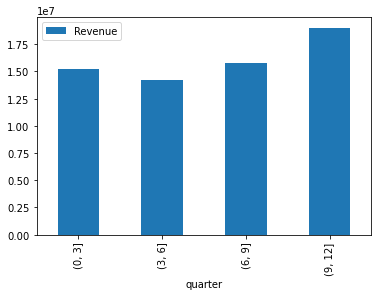

In [73]:
Cust_osdc_tax_amt.loc[: , ['quarter','Revenue']].groupby('quarter').sum().plot(kind = 'bar')

In [74]:
# Month in which we got maximum revenue .
Cust_osdc_tax_amt.loc[: , ['Month','Revenue']].groupby('Month').sum().sort_values(by = 'Revenue',ascending=False)

,Revenue
Month,
12,6.895558e+06
11,6.568418e+06
1,5.710444e+06
8,5.680026e+06
10,5.568104e+06
4,5.476952e+06
7,5.211236e+06
3,5.063508e+06
9,4.922412e+06


<AxesSubplot:xlabel='Month'>

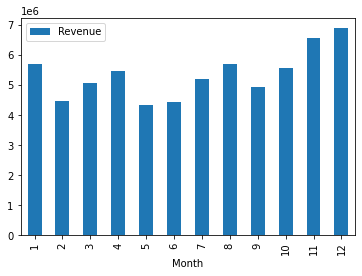

In [75]:
Cust_osdc_tax_amt.loc[: , ['Month','Revenue']].groupby('Month').sum().plot(kind = 'bar')

<AxesSubplot:xlabel='day'>

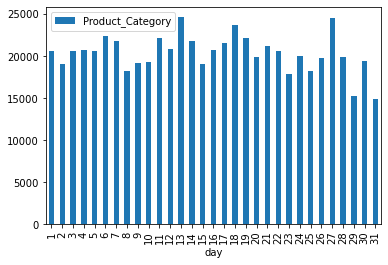

In [76]:
Cust_osdc_tax_amt.loc[: , ['day','Product_Category']].groupby('day').count().plot( kind = 'bar')

In [77]:
Cust_osdc_tax_amt.loc[: , ['day','Location']].groupby('day').count()


,Location
day,
1,20544
2,19056
3,20640
4,20688
5,20616
6,22380
7,21804
8,18264
9,19164


<AxesSubplot:xlabel='day'>

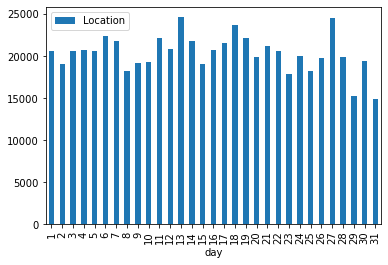

In [78]:
Cust_osdc_tax_amt.loc[: , ['day','Location']].groupby('day').count().plot( kind = 'bar')

#### 7) How number order varies and sales with different days 

In [79]:
Cust_osdc_tax_amt.loc[: , ['day','Quantity','Revenue']].groupby('day').sum()

,Quantity,Revenue
day,,
1,85896,2.038273e+06
2,90624,1.950428e+06
3,78144,1.906248e+06
4,82932,1.884388e+06
5,157104,2.446182e+06
6,97380,2.198808e+06
7,97764,2.187199e+06
8,95316,1.862488e+06
9,87624,1.963481e+06


<AxesSubplot:xlabel='day'>

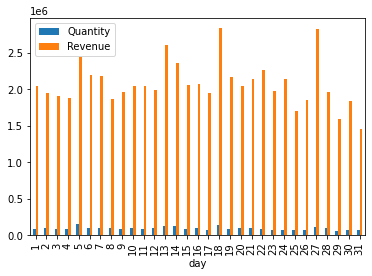

In [80]:
Cust_osdc_tax_amt.loc[: , ['day','Quantity','Revenue']].groupby('day').sum().plot( kind = 'bar')

#### 8) Calculate the Revenue , Marketing spend , percentage of marketing spend out of revenue , Tax , percentage of delivery charges by month   

In [81]:
mark_spend['Total_spend'] = mark_spend.Offline_Spend + mark_spend.Online_Spend

mark_spend['Month'] = mark_spend.Date.dt.month

In [82]:
Final_data = pd.merge( Cust_osdc_tax_amt , mark_spend , left_on = 'Transaction_Date' , right_on = 'Date' )

In [83]:
Final_data.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month_x', 'Coupon_Code',
       'Discount_pct', 'GST', 'Revenue', 'Gender', 'Location', 'Tenure_Months',
       'day', 'quarter', 'Date', 'Offline_Spend', 'Online_Spend',
       'Total_spend', 'Month_y'],
      dtype='object')

In [84]:
Final_data.drop(columns = ['Date', 'Month_y' ], inplace=True)

In [85]:
Final_data.rename( columns={ 'Month_x' : 'Month'}, inplace=True)

In [86]:
mark_spend

,Date,Offline_Spend,Online_Spend,Total_spend,Month
0,2019-01-01,4500,2424.50,6924.50,1
1,2019-01-02,4500,3480.36,7980.36,1
2,2019-01-03,4500,1576.38,6076.38,1
3,2019-01-04,4500,2928.55,7428.55,1
4,2019-01-05,4500,4055.30,8555.30,1
...,...,...,...,...,...
360,2019-12-27,4000,3396.87,7396.87,12
361,2019-12-28,4000,3246.84,7246.84,12
362,2019-12-29,4000,2546.58,6546.58,12
363,2019-12-30,4000,674.31,4674.31,12


In [87]:
a =(mark_spend.loc[ : ,['Month', 'Total_spend']].groupby('Month').sum())* 100 

In [88]:
b = (Final_data.loc[ : , ['Month', 'Revenue']].groupby('Month').sum())*1

In [89]:
b.rename(columns={'Revenue' : 'Total_spend' }, inplace=True)

In [90]:
PCT_MS_OOR = a/b

In [91]:
c = pd.DataFrame(Final_data.loc[ : , ['Month','Revenue','Delivery_Charges','GST']].groupby('Month').sum()).reset_index()

In [92]:
d = pd.DataFrame(mark_spend.loc[ : ,['Month', 'Total_spend']].groupby('Month').sum()).reset_index()

In [93]:
e = pd.DataFrame(PCT_MS_OOR).reset_index()

In [94]:
cd = pd.merge(c,d , on = 'Month')

In [95]:
cde = pd.merge(cd ,e , on = 'Month')

In [96]:
cde.rename(columns={ 'Total_spend_x':'Marketing_spend' , 'Total_spend_y':'Pct_MS_Out_of_revenue'}, inplace=True)

In [97]:
cde

,Month,Revenue,Delivery_Charges,GST,Marketing_spend,Pct_MS_Out_of_revenue
0,1,5.710444e+06,700821.00,6357.36,154928.95,2.713081
1,2,4.459154e+06,581451.36,5299.92,137107.92,3.074752
2,3,5.063508e+06,711891.48,7294.20,122250.09,2.414336
3,4,5.476952e+06,491157.36,7006.56,157026.83,2.867048
4,5,4.328132e+06,488951.88,7856.52,118259.64,2.732348
5,6,4.443552e+06,444670.08,7148.28,134318.14,3.022765
6,7,5.211236e+06,576289.56,9028.92,120217.85,2.306897
7,8,5.680026e+06,727140.00,10895.16,142904.15,2.515907
8,9,4.922412e+06,489144.72,7138.08,135514.54,2.753011
9,10,5.568104e+06,549921.72,6481.92,151224.65,2.715909


#### 9) How Marketing Spend is impacting on revenue

In [98]:
Final_data

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,GST,Revenue,Gender,Location,Tenure_Months,day,quarter,Offline_Spend,Online_Spend,Total_spend
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,158.6729,M,Chicago,12,1,"(0, 3]",4500,2424.50,6924.50
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,141.7648,M,Chicago,12,1,"(0, 3]",4500,2424.50,6924.50
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,124.8567,M,Chicago,12,1,"(0, 3]",4500,2424.50,6924.50
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,158.6729,M,Chicago,12,1,"(0, 3]",4500,2424.50,6924.50
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.10,141.7648,M,Chicago,12,1,"(0, 3]",4500,2424.50,6924.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16222,41718,2019-10-25,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1,199.00,6.0,Clicked,...,0.05,214.9500,F,New York,45,25,"(9, 12]",3500,1416.14,4916.14
630284,16222,41718,2019-10-25,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1,199.00,6.0,Clicked,...,0.05,214.9500,F,New York,45,25,"(9, 12]",3500,1416.14,4916.14
630285,16222,41718,2019-10-25,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1,199.00,6.0,Clicked,...,0.05,214.9500,F,New York,45,25,"(9, 12]",3500,1416.14,4916.14
630286,16222,41718,2019-10-25,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1,199.00,6.0,Clicked,...,0.05,214.9500,F,New York,45,25,"(9, 12]",3500,1416.14,4916.14


#### 10) Which Product was appeared in the transaction 

In [99]:
 ( Cust_osdc_tax_amt.groupby('Product_Category').Transaction_ID.nunique() / Cust_osdc_tax_amt.groupby('Product_Category').Transaction_ID.count() ) * 100

Product_Category
Accessories             6.801994
Android                 8.333333
Apparel                 3.737265
Bags                    6.841126
Bottles                 8.022388
Drinkware               6.038855
Gift Cards              8.228512
Headgear                7.284911
Housewares              8.333333
Lifestyle               4.614058
Nest                    7.484076
Nest-Canada             6.782334
Nest-USA                6.913818
Notebooks & Journals    6.898086
Office                  4.511490
Waze                    6.648616
Name: Transaction_ID, dtype: float64

#### 11) which product was purchased mostly based on quantity

In [100]:
Cust_osdc_tax_amt

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Revenue,Gender,Location,Tenure_Months,day,quarter
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10,0.10,158.6729,M,Chicago,12,1,"(0, 3]"
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC20,20,0.10,141.7648,M,Chicago,12,1,"(0, 3]"
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC30,30,0.10,124.8567,M,Chicago,12,1,"(0, 3]"
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10,0.10,158.6729,M,Chicago,12,1,"(0, 3]"
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC20,20,0.10,141.7648,M,Chicago,12,1,"(0, 3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,12,NE20,20,0.05,268.7375,F,New York,41,16,"(9, 12]"
630284,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,12,NE30,30,0.05,268.7375,F,New York,41,16,"(9, 12]"
630285,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,12,NE10,10,0.05,268.7375,F,New York,41,16,"(9, 12]"
630286,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,12,NE20,20,0.05,268.7375,F,New York,41,16,"(9, 12]"


In [101]:
Cust_osdc_tax_amt.groupby('Product_Category').Quantity.sum().sort_values(ascending =False)

Product_Category
Office                  1060596
Apparel                  389256
Drinkware                366012
Lifestyle                298572
Nest-USA                 257160
Bags                     183276
Notebooks & Journals     114672
Headgear                  42396
Nest                      34044
Housewares                29808
Bottles                   25080
Waze                      13728
Accessories               13164
Nest-Canada                5628
Gift Cards                 2472
Android                     540
Name: Quantity, dtype: int64

## 3) Performing Customer  Segmentation :

#### a) Heuristic(Value based, RFM)  Divide the customer into premium , Gold , Silver , Standard customers and define strategy on the same .

In [109]:
Final_data.Transaction_Date.min()

Timestamp('2019-01-01 00:00:00')

In [110]:
a = pd.DataFrame(Cust_osdc_tax_amt.groupby('CustomerID').Transaction_Date.min()).reset_index()

In [111]:
a.rename(columns= {'Transaction_Date' : 'Min_date'},inplace=True)

In [112]:
b = pd.DataFrame(Cust_osdc_tax_amt.groupby('CustomerID').Transaction_Date.max()).reset_index()

In [113]:
b.rename(columns= {'Transaction_Date' : 'Max_date'},inplace=True)

In [114]:
ab = pd.merge( a ,b, on ='CustomerID')

In [115]:
Segment_data1 = pd.merge( Final_data , ab , on='CustomerID' , how = 'left')

In [116]:
Segment_data = Segment_data1

In [117]:
Segment_data.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Revenue', 'Gender', 'Location', 'Tenure_Months',
       'day', 'quarter', 'Offline_Spend', 'Online_Spend', 'Total_spend',
       'Min_date', 'Max_date'],
      dtype='object')

In [119]:
Segment_data['Recency'] = ((Segment_data['Max_date']  - Segment_data['Min_date']) / np.timedelta64(1, 'D'))

In [102]:
Customer_360 = pd.merge(Final_data[['CustomerID','Gender','Location','Revenue', 'Product_Category','Quantity','GST','Avg_Price','Delivery_Charges']].groupby(['CustomerID','Gender','Location']).sum().reset_index() , 
    Final_data[['CustomerID','Gender','Location','Transaction_ID']].groupby(['CustomerID','Gender','Location']).count().reset_index()     
        , on = 'CustomerID')

In [103]:
Customer_360.columns

Index(['CustomerID', 'Gender_x', 'Location_x', 'Revenue', 'Quantity', 'GST',
       'Avg_Price', 'Delivery_Charges', 'Gender_y', 'Location_y',
       'Transaction_ID'],
      dtype='object')

In [104]:
Customer_360.drop(columns = ['Gender_y','Location_y'],inplace=True)

In [105]:
Customer_360.rename(columns={'Gender_x':'Gender','Location_x':'Location','Revenue':'Total_Revenue','Quantity':'Total_qnty_order',
    'GST':'Total_GST','Delivery_Charges':'Total_Delivery_Charges','Avg_Price':'Total_Avg_Price','Transaction_ID':'No_of_times_ordered'},inplace=True)


In [120]:
Customer_360_new = pd.merge(Customer_360, Segment_data[['CustomerID','Recency']].groupby('CustomerID').max().reset_index() 
                                      , on = 'CustomerID')

In [121]:
Customer_360_new.rename(columns = {'Total_Revenue':'Monetary' , 'Total_qnty_order':'Frequency'} , inplace=True)

In [123]:
Customer_360_new

,CustomerID,Gender,Location,Monetary,Frequency,Total_GST,Total_Avg_Price,Total_Delivery_Charges,No_of_times_ordered,Recency
0,12346,F,New York,2142.60672,36,3.36,305.88,1800.00,24,0.0
1,12347,M,New York,190176.47088,4080,92.04,44819.64,7903.68,708,223.0
2,12348,M,California,20125.21872,2508,41.04,4038.24,2365.80,276,119.0
3,12350,M,California,18284.33904,252,25.92,15748.80,1534.56,204,0.0
4,12356,F,Chicago,24986.31120,672,64.08,14937.96,7649.88,432,0.0
...,...,...,...,...,...,...,...,...,...,...
1463,18259,F,California,9842.70720,540,11.40,805.68,3261.96,72,0.0
1464,18260,M,New York,35753.91984,1536,62.76,13335.48,7368.72,468,105.0
1465,18269,M,Chicago,1952.74320,120,16.32,1072.08,618.00,96,76.0
1466,18277,F,Chicago,4005.60000,24,1.20,1788.00,72.00,12,0.0


In [124]:
Customer_360_new['seg'] = pd.qcut(Customer_360_new.Monetary, q =10, labels=False)

In [125]:
Customer_360_new[['Monetary','Frequency','Recency','seg']].groupby('seg').mean().T

seg,0,1,2,3,4,5,6,7,8,9
Monetary,1067.802292,4878.995357,9477.162178,14207.414295,20713.033321,28615.178769,39187.261307,54391.212361,81485.120077,183942.061574
Frequency,63.020408,285.714286,420.244898,602.219178,967.020408,1169.551020,1779.780822,2468.489796,3209.632653,8345.795918
Recency,11.278912,23.496599,27.775510,32.034247,51.040816,65.210884,72.383562,82.265306,106.074830,171.612245


In [126]:
# RFM Segmentation :
quantiles = Customer_360_new[['Monetary','Frequency','Recency']].quantile(q=[0.33 , 0.67])
quantiles

,Monetary,Frequency,Recency
0.33,12917.370226,336.0,0.00
0.67,41567.158762,1536.0,65.89


In [127]:
Customer_360_new['r_seg'] = np.where(Customer_360_new.Recency <= 1 , 'Active',np.where(Customer_360_new.Recency<=65.89 , 'At Risk' , 'churn'))
Customer_360_new['m_seg'] = np.where(Customer_360_new.Monetary <= 12917.370226 , 1 ,np.where(Customer_360_new.Monetary<=41567.158762 , 2 , 3 ))
Customer_360_new['f_seg'] = np.where(Customer_360_new.Frequency <= 336 , 1 ,np.where(Customer_360_new.Frequency<=1536.0 ,  2 ,3 ))

In [128]:
Customer_360_new['fm_seg'] = np.where(((Customer_360_new.f_seg == 3) & (Customer_360_new.m_seg ==3)) , 'Platinum',
    np.where((((Customer_360_new.f_seg == 3) & (Customer_360_new.m_seg ==2)) | ((Customer_360_new.f_seg == 2) & (Customer_360_new.m_seg ==3))) , 'Gold',
    np.where((((Customer_360_new.f_seg == 1) & (Customer_360_new.m_seg ==3)) | ((Customer_360_new.f_seg == 3) & (Customer_360_new.m_seg ==1)) | ((Customer_360_new.f_seg == 2) & (Customer_360_new.m_seg ==2))), 'Silver', 'Standard' )))

In [129]:
#Profiling
Customer_360_new[['Monetary', 'Frequency', 'Recency', 'r_seg', 'fm_seg']].groupby(['r_seg', 'fm_seg']).mean().T

# we perform simple heuristic approach by simple mathematics / agg. , groupby,profiling.
# I can come up with other rule also like age & gender or some thing .

r_seg            Active                                           \
fm_seg             Gold      Platinum        Silver     Standard   
Monetary   44108.801525  84085.045846  23578.182468  8102.355666   
Frequency   1926.135338   4406.803738    855.944056   224.025641   
Recency        0.285714      0.327103      0.160839     0.044872   

r_seg           At Risk                                            \
fm_seg             Gold       Platinum       Silver      Standard   
Monetary   41873.768664  101294.190392  24877.41306  10968.811102   
Frequency   1700.400000    6019.600000    837.00000    247.909091   
Recency       27.066667      28.700000     33.25000     28.772727   

r_seg             churn                                             
fm_seg             Gold       Platinum        Silver      Standard  
Monetary   50347.147373  135449.320398  26502.727002  11820.295001  
Frequency   1640.192308    6475.119617    778.447059    292.689655  
Recency      191.019231     204.669856    164.658824    158.816092

In [131]:
Customer_360_new['rfm_seg'] = Customer_360_new.r_seg + '_' + Customer_360_new.fm_seg

In [132]:
Customer_360_new.rfm_seg.value_counts()


Active_Standard     468
churn_Platinum      209
Active_Silver       143
Active_Gold         133
Active_Platinum     107
churn_Gold          104
churn_Standard       87
churn_Silver         85
At Risk_Standard     44
At Risk_Platinum     30
At Risk_Gold         30
At Risk_Silver       28
Name: rfm_seg, dtype: int64

In [133]:
Customer_360_new[((Customer_360_new.rfm_seg == 'At Risk_Gold') | (Customer_360_new.rfm_seg == 'At Risk_Platinum')) ]

# now we can target which we want .This priortizaion help us in marketing campaign .

,CustomerID,Gender,Location,Monetary,Frequency,Total_GST,Total_Avg_Price,Total_Delivery_Charges,No_of_times_ordered,Recency,seg,r_seg,m_seg,f_seg,fm_seg,rfm_seg
6,12370,F,New York,96693.65664,7344,147.48,47348.64,8243.76,1080,30.0,8,At Risk,3,3,Platinum,At Risk_Platinum
16,12413,F,New Jersey,39939.78384,3108,45.00,15636.12,3021.24,312,22.0,6,At Risk,2,3,Gold,At Risk_Gold
18,12415,M,Chicago,37813.65744,2028,80.04,18687.60,4301.64,564,18.0,6,At Risk,2,3,Gold,At Risk_Gold
61,12559,F,California,36402.49680,1632,31.92,22195.92,2080.56,264,60.0,6,At Risk,2,3,Gold,At Risk_Gold
67,12585,F,New Jersey,54072.19584,2508,122.52,28080.84,7559.16,864,10.0,7,At Risk,3,3,Platinum,At Risk_Platinum
76,12625,M,New Jersey,78388.73856,2232,89.64,47104.20,6760.80,696,63.0,8,At Risk,3,3,Platinum,At Risk_Platinum
78,12637,F,California,60777.46536,1500,128.16,34419.48,5987.52,900,40.0,7,At Risk,3,2,Gold,At Risk_Gold
84,12652,M,New York,38206.87584,2028,90.24,24108.48,4468.32,612,42.0,6,At Risk,2,3,Gold,At Risk_Gold
143,12854,M,New York,59273.24352,552,52.44,38315.40,2592.00,432,3.0,7,At Risk,3,2,Gold,At Risk_Gold
178,13001,F,Chicago,32812.11264,1632,59.04,22273.56,2937.60,420,46.0,5,At Risk,2,3,Gold,At Risk_Gold


#### b) Scientific (Using K-Means) & understand the profiles .Define strategy for each segment . 

In [134]:
Customer_360

,CustomerID,Gender,Location,Total_Revenue,Total_qnty_order,Total_GST,Total_Avg_Price,Total_Delivery_Charges,No_of_times_ordered
0,12346,F,New York,2142.60672,36,3.36,305.88,1800.00,24
1,12347,M,New York,190176.47088,4080,92.04,44819.64,7903.68,708
2,12348,M,California,20125.21872,2508,41.04,4038.24,2365.80,276
3,12350,M,California,18284.33904,252,25.92,15748.80,1534.56,204
4,12356,F,Chicago,24986.31120,672,64.08,14937.96,7649.88,432
...,...,...,...,...,...,...,...,...,...
1463,18259,F,California,9842.70720,540,11.40,805.68,3261.96,72
1464,18260,M,New York,35753.91984,1536,62.76,13335.48,7368.72,468
1465,18269,M,Chicago,1952.74320,120,16.32,1072.08,618.00,96
1466,18277,F,Chicago,4005.60000,24,1.20,1788.00,72.00,12


In [138]:
Customer_360_k_seg = pd.get_dummies(Customer_360, columns=['Gender','Location'], drop_first=True) #one hot encoding

In [139]:
Customer_360_k_seg

,CustomerID,Total_Revenue,Total_qnty_order,Total_GST,Total_Avg_Price,Total_Delivery_Charges,No_of_times_ordered,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
0,12346,2142.60672,36,3.36,305.88,1800.00,24,0,0,0,1,0
1,12347,190176.47088,4080,92.04,44819.64,7903.68,708,1,0,0,1,0
2,12348,20125.21872,2508,41.04,4038.24,2365.80,276,1,0,0,0,0
3,12350,18284.33904,252,25.92,15748.80,1534.56,204,1,0,0,0,0
4,12356,24986.31120,672,64.08,14937.96,7649.88,432,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,18259,9842.70720,540,11.40,805.68,3261.96,72,0,0,0,0,0
1464,18260,35753.91984,1536,62.76,13335.48,7368.72,468,1,0,0,1,0
1465,18269,1952.74320,120,16.32,1072.08,618.00,96,1,1,0,0,0
1466,18277,4005.60000,24,1.20,1788.00,72.00,12,0,1,0,0,0


In [140]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

Customer_360_k_seg=Customer_360_k_seg.apply(lambda x: Missing_imputation(x))

In [141]:
#Handling Outliers - Method2
def outlier_capping(x):
    #x = x.clip_upper(x.quantile(0.99))
    #x = x.clip_lower(x.quantile(0.01))
    x = x.clip(lower=x.quantile(0.01), upper=x.quantile(0.99))
    return x

Customer_360_k_seg=Customer_360_k_seg.apply(lambda x: outlier_capping(x))

In [142]:
Customer_360_k_seg.columns

Index(['CustomerID', 'Total_Revenue', 'Total_qnty_order', 'Total_GST',
       'Total_Avg_Price', 'Total_Delivery_Charges', 'No_of_times_ordered',
       'Gender_M', 'Location_Chicago', 'Location_New Jersey',
       'Location_New York', 'Location_Washington DC'],
      dtype='object')

In [143]:
Customer_360_k_seg.apply(lambda x: x.std()/x.mean())

CustomerID                0.113809
Total_Revenue             1.199671
Total_qnty_order          1.526960
Total_GST                 1.122019
Total_Avg_Price           1.168641
Total_Delivery_Charges    1.289526
No_of_times_ordered       1.112500
Gender_M                  1.322972
Location_Chicago          1.490239
Location_New Jersey       2.976304
Location_New York         1.879700
Location_Washington DC    4.311148
dtype: float64

## Dimension Reduction - Principle Component Analysis (PCA)

In [145]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA  

In [147]:
#standardize the data

sc = StandardScaler()
sc = sc.fit(Customer_360_k_seg)
Customer_360_k_seg_std = pd.DataFrame(sc.transform(Customer_360_k_seg), columns = Customer_360_k_seg.columns)

In [148]:
Customer_360_k_seg_std

,CustomerID,Total_Revenue,Total_qnty_order,Total_GST,Total_Avg_Price,Total_Delivery_Charges,No_of_times_ordered,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC
0,-1.668520,-0.790753,-0.642121,-0.838278,-0.843813,-0.442338,-0.846507,-0.756131,-0.671262,-0.336102,1.879059,-0.232036
1,-1.668520,2.991010,0.818003,0.567819,0.927735,0.688215,0.654733,1.322522,-0.671262,-0.336102,1.879059,-0.232036
2,-1.668520,-0.429085,0.250418,-0.240830,-0.695274,-0.337538,-0.293419,1.322522,-0.671262,-0.336102,-0.532181,-0.232036
3,-1.668520,-0.466109,-0.564132,-0.480570,-0.229219,-0.491504,-0.451444,1.322522,-0.671262,-0.336102,-0.532181,-0.232036
4,-1.668520,-0.331318,-0.412487,0.124489,-0.261489,0.641205,0.048969,-0.756131,1.489731,-0.336102,-0.532181,-0.232036
...,...,...,...,...,...,...,...,...,...,...,...,...
1463,1.667785,-0.635888,-0.460147,-0.710797,-0.823922,-0.171547,-0.741157,-0.756131,-0.671262,-0.336102,-0.532181,-0.232036
1464,1.667785,-0.114758,-0.100532,0.103560,-0.325264,0.589127,0.127982,1.322522,-0.671262,-0.336102,1.879059,-0.232036
1465,1.667785,-0.794572,-0.611792,-0.632786,-0.813320,-0.661274,-0.688482,1.322522,1.489731,-0.336102,-0.532181,-0.232036
1466,1.667785,-0.753285,-0.646454,-0.872527,-0.784828,-0.762407,-0.872845,-0.756131,1.489731,-0.336102,-0.532181,-0.232036


In [150]:
#unsupervised: variable reduction techniques
# VIF, Correlation matrics, PCA

pca_model = PCA(n_components = 12)
pca_model = pca_model.fit(Customer_360_k_seg_std)

In [151]:
sum(pca_model.explained_variance_ )

12.008179959100216

In [152]:
pca_model.explained_variance_     #Eigen values

array([5.25283367e+00, 1.36347276e+00, 1.16247134e+00, 1.09685840e+00,
       1.01513717e+00, 9.54745144e-01, 4.10271415e-01, 3.89474158e-01,
       2.01647436e-01, 1.28209644e-01, 3.18174080e-02, 1.24141718e-03])

In [153]:
pca_model.explained_variance_ratio_

array([4.37437954e-01, 1.13545330e-01, 9.68066219e-02, 9.13426021e-02,
       8.45371382e-02, 7.95078977e-02, 3.41659949e-02, 3.24340707e-02,
       1.67925062e-02, 1.06768590e-02, 2.64964450e-03, 1.03380961e-04])

In [154]:
np.cumsum(pca_model.explained_variance_ratio_)

array([0.43743795, 0.55098328, 0.64778991, 0.73913251, 0.82366965,
       0.90317754, 0.93734354, 0.96977761, 0.98657012, 0.99724697,
       0.99989662, 1.        ])

In [23]:
#Criteria to choose number of compoents
  #  1. Cumulative should be more than 75%
  #  2. Individual component should explain more than 0.8 variancce
#number of components = 10  

In [155]:
pca_model = PCA(n_components = 5)
pca_model = pca_model.fit(Customer_360_k_seg_std)

In [157]:
PCs = pd.DataFrame(pca_model.transform(Customer_360_k_seg_std), columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [158]:
PCs     # you are able to reduce dimesnisons of 65% (from 31 to 10 ) by loosing the information about 24% - Dimension Reduction

,PC1,PC2,PC3,PC4,PC5
0,-1.858488,1.711338,-1.125812,-0.087643,-1.200890
1,2.720384,1.716220,-0.800958,0.848498,-2.068101
2,-0.737194,0.045021,0.269178,0.974927,-1.888549
3,-1.088919,0.035058,0.248645,1.017366,-1.873777
4,-0.048637,-1.419314,-0.560151,-0.166976,-1.146691
...,...,...,...,...,...
1463,-1.462697,0.051022,-0.013653,-0.616222,1.688242
1464,0.136508,1.540348,-0.962699,0.249500,0.754967
1465,-1.626138,-1.682668,-0.420539,0.238905,0.814007
1466,-1.869446,-1.563265,-0.617415,-0.756581,1.612987


In [27]:
#Build segmentation - Input: PCs

In [159]:
#Loading matrics

Loadings =  pd.DataFrame((pca_model.components_.T * np.sqrt(pca_model.explained_variance_)).T,columns=Customer_360_k_seg.columns).T

Loadings.columns= ['PC1','PC2','PC3','PC4','PC5' ]

In [160]:
Loadings.to_csv('Loadings_ML_case_study_4.csv')

In [161]:
Final_list = ['No_of_times_ordered',
'Location_New York',
'Location_New Jersey',
'Location_Washington DC',
'CustomerID'
]

In [162]:
#seg_input = telco_new_std[Final_list]  # variable reduction output
seg_input = PCs   #Dimension Reduction output

In [163]:
#KMeans Clustering   input: standardized data, number of cluster

km_3 = KMeans(n_clusters=3, random_state=123).fit(seg_input)

C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [164]:
km_3.labels_   #Segment labels

array([2, 1, 2, ..., 0, 0, 1])

In [165]:
km_3.cluster_centers_

array([[-0.6042257 , -1.52691516, -0.49611001, -0.09995941, -0.0694466 ],
       [ 4.60014499,  0.16567922, -0.01728309, -0.01498283,  0.01401589],
       [-0.80501684,  0.65265059,  0.22872769,  0.04878219,  0.02816405]])

In [166]:
km_3 = KMeans(n_clusters=3, random_state=123).fit(seg_input)
km_4 = KMeans(n_clusters=4, random_state=123).fit(seg_input)
km_5 = KMeans(n_clusters=5, random_state=123).fit(seg_input)
km_6 = KMeans(n_clusters=6, random_state=123).fit(seg_input)
km_7 = KMeans(n_clusters=7, random_state=123).fit(seg_input)
km_8 = KMeans(n_clusters=8, random_state=123).fit(seg_input)

C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [167]:
Customer_360_k_seg['Cluster_3'] = km_3.labels_
Customer_360_k_seg['Cluster_4'] = km_4.labels_
Customer_360_k_seg['Cluster_5'] = km_5.labels_
Customer_360_k_seg['Cluster_6'] = km_6.labels_
Customer_360_k_seg['Cluster_7'] = km_7.labels_
Customer_360_k_seg['Cluster_8'] = km_8.labels_

In [168]:
Customer_360_k_seg.head()

,CustomerID,Total_Revenue,Total_qnty_order,Total_GST,Total_Avg_Price,Total_Delivery_Charges,No_of_times_ordered,Gender_M,Location_Chicago,Location_New Jersey,Location_New York,Location_Washington DC,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8
0,12407.36,2142.60672,36.0,3.36,305.88,1800.00,24.0,0,0,0,1,0,2,1,0,0,2,2
1,12407.36,190176.47088,4080.0,92.04,44819.64,7903.68,708.0,1,0,0,1,0,1,2,1,2,3,1
2,12407.36,20125.21872,2508.0,41.04,4038.24,2365.80,276.0,1,0,0,0,0,2,0,2,1,5,0
3,12407.36,18284.33904,252.0,25.92,15748.80,1534.56,204.0,1,0,0,0,0,2,0,2,1,5,0
4,12407.36,24986.31120,672.0,64.08,14937.96,7649.88,432.0,0,1,0,0,0,0,0,2,1,0,0


In [38]:
#To finding the optimal solution (optimal value of k), we follow below approaches
    #1. Using SC metrics/Elbow Analysis
    #2. Using profiling
    #3. Best practices

### Silhoutte Score

In [169]:
silhouette_score(seg_input, km_4.labels_)

0.30517850052647894

In [170]:
# calculate SC for K=3 through K=12
k_range = range(3, 8)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(seg_input)
    scores.append(silhouette_score(seg_input, km.labels_))

C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

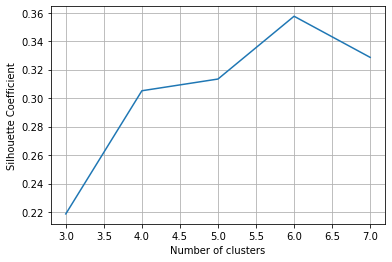

In [171]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [ ]:
scores

In [ ]:
#based on sc score, the solution K=3, the second solution can be k=4

### Elbow Analysis 

In [172]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( seg_input )
    cluster_errors.append( clusters.inertia_ )

C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ashis\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [173]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,num_clusters,cluster_errors
0,1,14509.764486
1,2,9477.565067
2,3,8039.192927
3,4,6765.958738
4,5,5565.529728
5,6,4415.491149
6,7,3875.790755
7,8,3455.688701
8,9,3175.995188
9,10,2894.039244


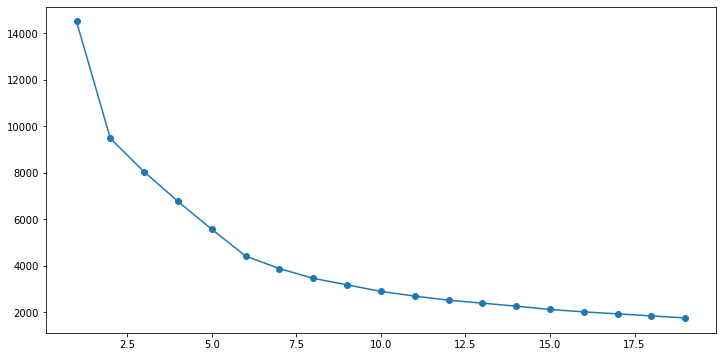

In [174]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

### 4) Predicting customer life timr value (low / Medium / High)

#### 1) First define dependent variable with categories low , medium , high value using customer revenue 

In [138]:
# We need to create a customer 360 file

In [139]:
Final_data.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Revenue', 'Gender', 'Location', 'Tenure_Months',
       'day', 'quarter', 'Offline_Spend', 'Online_Spend', 'Total_spend'],
      dtype='object')

In [140]:
Final_data[['CustomerID','Gender','Location','Revenue', 'Product_Category','Quantity','GST','Avg_Price','Delivery_Charges']].groupby(['CustomerID','Gender','Location']).sum().reset_index()

,CustomerID,Gender,Location,Revenue,Quantity,GST,Avg_Price,Delivery_Charges
0,12346,F,New York,2142.60672,36,3.36,305.88,1800.00
1,12347,M,New York,190176.47088,4080,92.04,44819.64,7903.68
2,12348,M,California,20125.21872,2508,41.04,4038.24,2365.80
3,12350,M,California,18284.33904,252,25.92,15748.80,1534.56
4,12356,F,Chicago,24986.31120,672,64.08,14937.96,7649.88
...,...,...,...,...,...,...,...,...
1463,18259,F,California,9842.70720,540,11.40,805.68,3261.96
1464,18260,M,New York,35753.91984,1536,62.76,13335.48,7368.72
1465,18269,M,Chicago,1952.74320,120,16.32,1072.08,618.00
1466,18277,F,Chicago,4005.60000,24,1.20,1788.00,72.00


In [141]:
Final_data[['CustomerID','Gender','Location','Transaction_ID']].groupby(['CustomerID','Gender','Location']).count().reset_index()

,CustomerID,Gender,Location,Transaction_ID
0,12346,F,New York,24
1,12347,M,New York,708
2,12348,M,California,276
3,12350,M,California,204
4,12356,F,Chicago,432
...,...,...,...,...
1463,18259,F,California,72
1464,18260,M,New York,468
1465,18269,M,Chicago,96
1466,18277,F,Chicago,12


In [142]:
Customer_360 = pd.merge(Final_data[['CustomerID','Gender','Location','Revenue', 'Product_Category','Quantity','GST','Avg_Price','Delivery_Charges']].groupby(['CustomerID','Gender','Location']).sum().reset_index() , 
    Final_data[['CustomerID','Gender','Location','Transaction_ID']].groupby(['CustomerID','Gender','Location']).count().reset_index()     
        , on = 'CustomerID')

In [143]:
Customer_360.columns

Index(['CustomerID', 'Gender_x', 'Location_x', 'Revenue', 'Quantity', 'GST',
       'Avg_Price', 'Delivery_Charges', 'Gender_y', 'Location_y',
       'Transaction_ID'],
      dtype='object')

In [144]:
Customer_360.drop(columns = ['Gender_y','Location_y'],inplace=True)

In [145]:
Customer_360.rename(columns={'Gender_x':'Gender','Location_x':'Location','Revenue':'Total_Revenue','Quantity':'Total_qnty_order',
    'GST':'Total_GST','Delivery_Charges':'Total_Delivery_Charges','Avg_Price':'Total_Avg_Price','Transaction_ID':'No_of_times_ordered'},inplace=True)

In [146]:
Customer_360

,CustomerID,Gender,Location,Total_Revenue,Total_qnty_order,Total_GST,Total_Avg_Price,Total_Delivery_Charges,No_of_times_ordered
0,12346,F,New York,2142.60672,36,3.36,305.88,1800.00,24
1,12347,M,New York,190176.47088,4080,92.04,44819.64,7903.68,708
2,12348,M,California,20125.21872,2508,41.04,4038.24,2365.80,276
3,12350,M,California,18284.33904,252,25.92,15748.80,1534.56,204
4,12356,F,Chicago,24986.31120,672,64.08,14937.96,7649.88,432
...,...,...,...,...,...,...,...,...,...
1463,18259,F,California,9842.70720,540,11.40,805.68,3261.96,72
1464,18260,M,New York,35753.91984,1536,62.76,13335.48,7368.72,468
1465,18269,M,Chicago,1952.74320,120,16.32,1072.08,618.00,96
1466,18277,F,Chicago,4005.60000,24,1.20,1788.00,72.00,12


In [147]:
Customer_360['Total_Revenue'].quantile(q=[0.33 , 0.67])

0.33    12917.370226
0.67    41567.158762
Name: Total_Revenue, dtype: float64

In [148]:
Customer_360[ 'Category' ] = np.where(Customer_360.Total_Revenue < 12917.370226 , 'Low',
        np.where(Customer_360.Total_Revenue < 41567.158762 , 'Medium','High'))

In [149]:
Customer_360

,CustomerID,Gender,Location,Total_Revenue,Total_qnty_order,Total_GST,Total_Avg_Price,Total_Delivery_Charges,No_of_times_ordered,Category
0,12346,F,New York,2142.60672,36,3.36,305.88,1800.00,24,Low
1,12347,M,New York,190176.47088,4080,92.04,44819.64,7903.68,708,High
2,12348,M,California,20125.21872,2508,41.04,4038.24,2365.80,276,Medium
3,12350,M,California,18284.33904,252,25.92,15748.80,1534.56,204,Medium
4,12356,F,Chicago,24986.31120,672,64.08,14937.96,7649.88,432,Medium
...,...,...,...,...,...,...,...,...,...,...
1463,18259,F,California,9842.70720,540,11.40,805.68,3261.96,72,Low
1464,18260,M,New York,35753.91984,1536,62.76,13335.48,7368.72,468,Medium
1465,18269,M,Chicago,1952.74320,120,16.32,1072.08,618.00,96,Low
1466,18277,F,Chicago,4005.60000,24,1.20,1788.00,72.00,12,Low


##### 2) Then perform classification model 

In [170]:
#Packages related to general operating system & warnings
import os 
import warnings
warnings.filterwarnings('ignore')

#Packages related to data importing, manipulation, exploratory data analysis, data understanding
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pandas_profiling
import scipy.stats as stats

#Packages related to data visualizaiton
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Setting plot sizes and type of plot
plt.rc("font", size=14)
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(6,3))
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

#Modules related to split the data & gridsearch
from sklearn.model_selection import train_test_split, GridSearchCV

#Module related to calculation of metrics
from sklearn import metrics

#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Modules related to preprocessing (Imputation of missings, standardiszation, new features creation, converting categorical to numerical)
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder

#Moudles related to feature selection
from sklearn.feature_selection import RFE, RFECV, SelectKBest, chi2, SelectPercentile, f_classif, mutual_info_classif, f_regression, VarianceThreshold, SelectFromModel, mutual_info_classif, mutual_info_regression, SelectFpr, SelectFdr, SelectFwe

#Modules related key techniques of supervised learning 
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa

from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor #, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from xgboost import XGBClassifier, XGBRegressor
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR

<Figure size 432x216 with 0 Axes>

In [171]:
Customer_360.columns

Index(['CustomerID', 'Gender', 'Location', 'Total_Revenue', 'Total_qnty_order',
       'Total_GST', 'Total_Avg_Price', 'Total_Delivery_Charges',
       'No_of_times_ordered', 'Category'],
      dtype='object')

In [151]:
Customer_360.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1468 entries, 0 to 1467
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1468 non-null   int64  
 1   Gender                  1468 non-null   object 
 2   Location                1468 non-null   object 
 3   Total_Revenue           1468 non-null   float64
 4   Total_qnty_order        1468 non-null   int64  
 5   Total_GST               1468 non-null   float64
 6   Total_Avg_Price         1468 non-null   float64
 7   Total_Delivery_Charges  1468 non-null   float64
 8   No_of_times_ordered     1468 non-null   int64  
 9   Category                1468 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 126.2+ KB


In [152]:
x_var = pd.get_dummies( Customer_360,columns = ['Gender','Location'],drop_first=True )

In [153]:
x_var.drop(columns='Category' , inplace=True)

In [154]:
Customer_360_new = pd.concat([x_var , Customer_360['Category']], axis = 1)

In [155]:
Customer_360_new.columns

Index(['CustomerID', 'Total_Revenue', 'Total_qnty_order', 'Total_GST',
       'Total_Avg_Price', 'Total_Delivery_Charges', 'No_of_times_ordered',
       'Gender_M', 'Location_Chicago', 'Location_New Jersey',
       'Location_New York', 'Location_Washington DC', 'Category'],
      dtype='object')

In [156]:
#splitting 
y = Customer_360_new[['Category']]
x = Customer_360_new[Customer_360_new.columns.difference(['Category','Total_Revenue'])] 

In [157]:
#Encoder for y variable
enc =LabelEncoder()
y = enc.fit_transform(y)  # y value will be assign on the basis of alphabetical ascending ordery

y

array([1, 0, 2, ..., 1, 1, 0])

In [158]:
pd.Series(y).value_counts()
# data is nearly  balanced so not need to balance it 

2    498
0    485
1    485
dtype: int64

In [159]:
#splitting to train and test dataset
train_X, test_X, train_y, test_y = train_test_split(x,y, test_size = 0.3,random_state=123)

### K-Nearest Neighbors

In [160]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_X)

std_data_train = pd.DataFrame(std_data, columns=train_X.columns, index = train_X.index )

std_data_test = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index )

In [161]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model = model.fit(std_data_train, train_y)

train_pred = model.predict(std_data_train)
test_pred = model.predict(std_data_test)

In [162]:
model.best_score_

0.8198921079243628

In [163]:
print(metrics.classification_report(train_y, train_pred))

print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       349
           1       0.91      0.95      0.93       333
           2       0.88      0.88      0.88       345

    accuracy                           0.92      1027
   macro avg       0.92      0.92      0.92      1027
weighted avg       0.92      0.92      0.92      1027

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       136
           1       0.80      0.87      0.84       152
           2       0.73      0.69      0.71       153

    accuracy                           0.80       441
   macro avg       0.81      0.81      0.81       441
weighted avg       0.80      0.80      0.80       441



## Naive Bayes 


In [164]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

GaussianNB()

In [165]:
print (metrics.confusion_matrix( test_y,nb_clf.predict( test_X) ))

print ( metrics.accuracy_score( test_y, nb_clf.predict( test_X ) ))

[[107   0  29]
 [  0 141  11]
 [  9  27 117]]
0.8276643990929705


###  Decision Trees

In [166]:
#### Fine Tuning the parameters

param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}


In [167]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])})

In [168]:
tree.best_score_

tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=4)

In [169]:
tree.best_params_

{'max_depth': 4, 'max_features': 4}

In [170]:
train_pred = tree.predict(train_X)

print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       349
           1       0.88      0.83      0.85       333
           2       0.76      0.85      0.80       345

    accuracy                           0.86      1027
   macro avg       0.87      0.86      0.86      1027
weighted avg       0.87      0.86      0.86      1027



In [171]:
test_pred = tree.predict(test_X)

print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       136
           1       0.85      0.83      0.84       152
           2       0.75      0.78      0.76       153

    accuracy                           0.83       441
   macro avg       0.84      0.83      0.84       441
weighted avg       0.83      0.83      0.83       441



### Bagging 

In [172]:
from sklearn.ensemble import BaggingClassifier

In [173]:
### Tuning parameters

pargrid_ada = {'n_estimators': [50, 60, 70]}

gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [174]:
gscv_results = gscv_bagging.fit(train_X, train_y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [175]:
gscv_results.best_params_

{'n_estimators': 50}

In [176]:
gscv_results.best_score_

0.8948662088562633

## Random Forest

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=70 , max_features=6, n_jobs=-1) # If I want the score from oob then use it .
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_features=6, n_estimators=70, n_jobs=-1,
                       oob_score=True)

In [179]:
### Feature importance from the Random Forest Model

radm_clf.feature_importances_

array([0.02340783, 0.00359405, 0.00261981, 0.00351175, 0.00314328,
       0.00222056, 0.17454513, 0.51067342, 0.10409128, 0.06713338,
       0.10505951])

In [180]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

<Figure size 3600x3600 with 0 Axes>

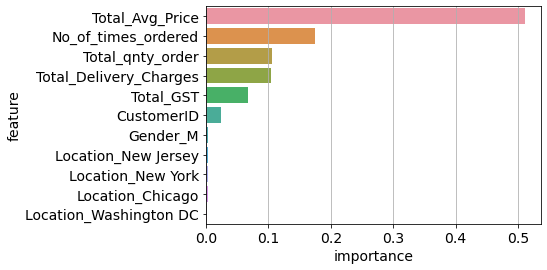

In [181]:
import seaborn as sn

indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )
plt.Figure(figsize=(50,50))

In [182]:
### Tuning parameters

pargrid_ada = {'n_estimators': [50, 60, 70],
                'max_features': [5,6,7]}
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [183]:
gscv_results = gscv_Rf.fit(train_X, train_y)
gscv_results.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.9036277527823822

In [184]:
gscv_results.best_params_

{'max_features': 5, 'n_estimators': 60}

In [185]:
gscv_results.predict(train_X)


array([2, 2, 2, ..., 1, 2, 1])


## Boosting

In [186]:
#### Ada Boosting

pargrid_ada = {'n_estimators': [100, 200, 400],
               'learning_rate': [10 ** x for x in range(-1, 1)]}

In [187]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [188]:
gscv_ada.fit(train_X, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1],
                         'n_estimators': [100, 200, 400]},
             verbose=True)

In [189]:
print ( gscv_ada.best_params_ )

print ( gscv_ada.best_score_ )

{'learning_rate': 1, 'n_estimators': 400}
0.8335117215249822


In [190]:
clf_ada = gscv_ada.best_estimator_

In [191]:
ad=AdaBoostClassifier(learning_rate = 0.1, n_estimators=400)
ad.fit(train_X, train_y )

AdaBoostClassifier(learning_rate=0.1, n_estimators=400)

In [192]:
ad.predict_proba(train_X)

array([[0.22616546, 0.17731959, 0.59651496],
       [0.19398626, 0.22907409, 0.57693965],
       [0.21152025, 0.21815005, 0.5703297 ],
       ...,
       [0.02972775, 0.57732723, 0.39294502],
       [0.34903355, 0.0634818 , 0.58748465],
       [0.04770633, 0.40326479, 0.54902888]])

In [193]:
train_y

array([2, 2, 2, ..., 1, 2, 1])

In [194]:
#Train data - AUC Score
print(metrics.roc_auc_score(train_y, pd.DataFrame(ad.predict_proba(train_X)),multi_class='ovr'))

#Test data - AUC Score
print(metrics.roc_auc_score(test_y, pd.DataFrame(ad.predict_proba(test_X)),multi_class='ovr'))

0.9406786621849793
0.9358142592179166




### Gradient Boost

In [195]:
gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [196]:
gscv_gbm.fit(train_X, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1],
                         'n_estimators': [100, 200, 400]},
             verbose=True)

In [197]:
#Train data - AUC Score
print(metrics.roc_auc_score(train_y, pd.DataFrame(gscv_gbm.predict_proba(train_X)),multi_class='ovr'))

#Test data - AUC Score
print(metrics.roc_auc_score(test_y, pd.DataFrame(gscv_gbm.predict_proba(test_X)),multi_class='ovr'))

1.0
0.9762631115548098


In [198]:
print ( gscv_gbm.best_params_ )

clf_gbm = gscv_gbm.best_estimator_

print ( gscv_gbm.best_score_ )

{'learning_rate': 0.1, 'n_estimators': 200}
0.8997537295761306


In [199]:
gbm=GradientBoostingClassifier(learning_rate = 0.1, n_estimators=200)
gbm.fit(train_X, train_y )

GradientBoostingClassifier(n_estimators=200)

In [200]:
#Train data - AUC Score
print(metrics.roc_auc_score(train_y, pd.DataFrame(gscv_gbm.predict_proba(train_X)),multi_class='ovr'))

#Test data - AUC Score
print(metrics.roc_auc_score(test_y, pd.DataFrame(gscv_gbm.predict_proba(test_X)),multi_class='ovr'))

1.0
0.9762631115548098


### XGBOOST

In [201]:
from xgboost import XGBClassifier

#All Columns
xgb_estimator = XGBClassifier(n_estimators=200,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)

In [202]:
test_X = test_X[test_X.columns.difference(['pred_prob'])]

xgb_estimator.fit(train_X, train_y)

xgb_estimator.predict(train_X)

[15:18:00] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



array([2, 2, 2, ..., 1, 2, 1], dtype=int64)

In [203]:
#Train data - AUC Score

print ( metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X)),multi_class='ovr'))

#Test data - AUC Score

print ( metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X)),multi_class='ovr'))

1.0
0.9773286093667677


In [204]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       333
           2       1.00      1.00      1.00       345

    accuracy                           1.00      1027
   macro avg       1.00      1.00      1.00      1027
weighted avg       1.00      1.00      1.00      1027

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       136
           1       0.89      0.91      0.90       152
           2       0.84      0.84      0.84       153

    accuracy                           0.89       441
   macro avg       0.89      0.89      0.89       441
weighted avg       0.89      0.89      0.89       441



In [205]:
# with all tuning parameters

xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=1000,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

In [206]:
xgb_estimator.fit(train_X, train_y)

[15:18:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "reg_alpa", "scale_pos_weight", "verbose" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [207]:
print(metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X)),multi_class='ovr'))

print(metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X)),multi_class='ovr'))

0.9991991399441119
0.9801561377572909


In [208]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       349
           1       0.98      0.99      0.98       333
           2       0.98      0.97      0.97       345

    accuracy                           0.98      1027
   macro avg       0.98      0.98      0.98      1027
weighted avg       0.98      0.98      0.98      1027

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       136
           1       0.90      0.92      0.91       152
           2       0.85      0.86      0.85       153

    accuracy                           0.90       441
   macro avg       0.90      0.90      0.90       441
weighted avg       0.90      0.90      0.90       441



### 5) Cross selling ( which products are selling together)

#### . You can perform exploratory analysis & market basket analysis to understand which items can be bundled together.

In [233]:
Cust_osdc_tax_amt

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,GST,Revenue,Gender,Location,Tenure_Months,day,quarter
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10,0.10,158.6729,M,Chicago,12,1,"(0, 3]"
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC20,20,0.10,141.7648,M,Chicago,12,1,"(0, 3]"
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC30,30,0.10,124.8567,M,Chicago,12,1,"(0, 3]"
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC10,10,0.10,158.6729,M,Chicago,12,1,"(0, 3]"
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,1,ELEC20,20,0.10,141.7648,M,Chicago,12,1,"(0, 3]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,12,NE20,20,0.05,268.7375,F,New York,41,16,"(9, 12]"
630284,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,12,NE30,30,0.05,268.7375,F,New York,41,16,"(9, 12]"
630285,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,12,NE10,10,0.05,268.7375,F,New York,41,16,"(9, 12]"
630286,16333,47144,2019-12-16,GGOENEBQ093499,Nest Detect - USA,Nest,5,49.95,6.5,Not Used,12,NE20,20,0.05,268.7375,F,New York,41,16,"(9, 12]"


In [239]:
MBA_data = pd.merge(Cust_osdc_tax_amt[['Transaction_ID','Product_Description','Revenue', 'Product_Category','Quantity','GST','Avg_Price','Delivery_Charges']].groupby(['Transaction_ID','Product_Description']).sum().reset_index(),
     Cust_osdc_tax_amt[['Transaction_ID','Product_Category','Product_Description','CustomerID']].groupby(['Transaction_ID','Product_Description']).count().reset_index(),
        on = 'Transaction_ID')

In [240]:
MBA_data.columns

Index(['Transaction_ID', 'Product_Description_x', 'Revenue', 'Quantity', 'GST',
       'Avg_Price', 'Delivery_Charges', 'Product_Description_y',
       'Product_Category', 'CustomerID'],
      dtype='object')

In [242]:
MBA_data.drop(columns = 'Product_Description_y' , inplace=True)

In [245]:
MBA_data.rename(columns={'Product_Description_x':'Product_Description','Product_Category':'Product_Category',
                         'Revenue':'Total_Revenue','Quantity':'Total_qnty_order',
  'GST':'Total_GST','Delivery_Charges':'Total_Delivery_Charges','Avg_Price':'Total_Avg_Price','CustomerID':'No_of_times_ordered'},inplace=True)

In [246]:
MBA_data

,Transaction_ID,Product_Description,Total_Revenue,Total_qnty_order,Total_GST,Total_Avg_Price,Total_Delivery_Charges,Product_Category,No_of_times_ordered
0,16679,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1701.17760,12,1.20,1844.52,78.00,12,12
1,16680,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1701.17760,12,1.20,1844.52,78.00,12,12
2,16681,Google Laptop and Cell Phone Stickers,99.64800,12,1.20,24.60,78.00,12,12
3,16682,Badge Holder,892.30800,372,1.20,23.88,78.00,12,12
4,16682,Badge Holder,892.30800,372,1.20,23.88,78.00,12,12
...,...,...,...,...,...,...,...,...,...
185756,48493,Nest Cam Indoor Security Camera - USA,1679.16000,12,1.20,1455.60,78.00,12,12
185757,48494,Google Zip Hoodie Black,632.16576,12,2.16,587.04,78.00,12,12
185758,48495,Nest Learning Thermostat 3rd Gen-USA - White,1681.85280,12,1.20,1822.56,78.00,12,12
185759,48496,Nest Protect Smoke + CO White Wired Alarm-USA,5392.32000,60,1.20,966.24,78.00,12,12


In [247]:
# Clean up spac
# es in description and remove any rows that don't have a valid invoice
MBA_data['Product_Description'] = MBA_data['Product_Description'].str.strip()
MBA_data.dropna(axis=0, subset=['Transaction_ID'], inplace=True)

In [248]:
MBA_data.head()

,Transaction_ID,Product_Description,Total_Revenue,Total_qnty_order,Total_GST,Total_Avg_Price,Total_Delivery_Charges,Product_Category,No_of_times_ordered
0,16679,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1701.1776,12,1.2,1844.52,78.0,12,12
1,16680,Nest Learning Thermostat 3rd Gen-USA - Stainle...,1701.1776,12,1.2,1844.52,78.0,12,12
2,16681,Google Laptop and Cell Phone Stickers,99.6480,12,1.2,24.60,78.0,12,12
3,16682,Badge Holder,892.3080,372,1.2,23.88,78.0,12,12
4,16682,Badge Holder,892.3080,372,1.2,23.88,78.0,12,12


In [249]:
MBA_data.dtypes

Transaction_ID              int64
Product_Description        object
Total_Revenue             float64
Total_qnty_order            int64
Total_GST                 float64
Total_Avg_Price           float64
Total_Delivery_Charges    float64
Product_Category            int64
No_of_times_ordered         int64
dtype: object

In [252]:
#Drop the rows that don’t have invoice numbers and remove the credit transactions (those with invoice numbers containing C).
MBA_data['Transaction_ID'] = MBA_data['Transaction_ID'].astype('str')
MBA_data = MBA_data[~MBA_data['Transaction_ID'].str.contains('C')]

In [254]:
basket = (MBA_data.groupby(['Transaction_ID', 'Product_Description'])['Total_qnty_order'].sum().unstack().reset_index().fillna(0).set_index('Transaction_ID'))

In [259]:
basket

Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,Android 17oz Stainless Steel Sport Bottle,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16684,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [260]:
#we need to consolidate the items into 1 transaction per row with each product 1 hot encoded.
# Convert the units to 1 hot encoded values
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1    

#MBA_data = MBA_data.applymap(encode_units)


In [263]:
 basket_sets = basket.applymap(encode_units)

In [283]:
basket_sets

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Product_Description,1 oz Hand Sanitizer,20 oz Stainless Steel Insulated Tumbler,22 oz Android Bottle,22 oz YouTube Bottle Infuser,23 oz Wide Mouth Sport Bottle,24 oz YouTube Sergeant Stripe Bottle,26 oz Double Wall Insulated Bottle,7&quot; Dog Frisbee,8 pc Android Sticker Sheet,Android 17oz Stainless Steel Sport Bottle,...,YouTube Twill Cap,YouTube Women's Favorite Tee White,YouTube Women's Fleece Hoodie Black,YouTube Women's Racer Back Tank Black,YouTube Women's Short Sleeve Hero Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Charcoal,YouTube Women's Short Sleeve Tri-blend Badge Tee Grey,YouTube Womens 3/4 Sleeve Baseball Raglan White/Black,YouTube Wool Heather Cap Heather/Black,YouTube Youth Short Sleeve Tee Red
Transaction_ID,,,,,,,,,,,,,,,,,,,,,
16679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16682,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16684,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [265]:
# No need to track postage - It is not an item
#basket_sets.drop('POSTAGE', inplace=True, axis=1)

In [271]:
# !pip install mlxtend

In [272]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [294]:
# Build up the frequent items
#Now that the data is structured properly, we can generate frequent item sets that have a support of 
#at least 1% (this number was chosen so that I could get enough useful examples):
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\ashis\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [295]:
frequent_itemsets.sort_values(by='support', ascending=False)

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
31,0.14044,(Nest Learning Thermostat 3rd Gen-USA - Stainl...
29,0.13312,(Nest Cam Outdoor Security Camera - USA)
28,0.12920,(Nest Cam Indoor Security Camera - USA)
33,0.05444,(Nest Protect Smoke + CO White Battery Alarm-USA)
32,0.04356,(Nest Learning Thermostat 3rd Gen-USA - White)
34,0.04260,(Nest Protect Smoke + CO White Wired Alarm-USA)
36,0.03376,(Nest Thermostat E - USA)
13,0.03224,(Google Laptop and Cell Phone Stickers)
23,0.02776,(Google Sunglasses)
41,0.02772,"(Nest Cam Outdoor Security Camera - USA, Nest ..."


In [297]:
#Generate the rules with their corresponding support, confidence and lift:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.01)
rules

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.13312,0.12920,0.02772,0.208233,1.611712,0.010521,1.099819,0.437825
1,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.12920,0.13312,0.02772,0.214551,1.611712,0.010521,1.103675,0.435854
2,(Nest Cam Outdoor Security Camera - USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.13312,0.14044,0.01204,0.090445,0.644010,-0.006655,0.945033,-0.389371
3,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Cam Outdoor Security Camera - USA),0.14044,0.13312,0.01204,0.085731,0.644010,-0.006655,0.948167,-0.391389


In [298]:
rules.sort_values(by='confidence', ascending=False )

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.12920,0.13312,0.02772,0.214551,1.611712,0.010521,1.103675,0.435854
0,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.13312,0.12920,0.02772,0.208233,1.611712,0.010521,1.099819,0.437825
2,(Nest Cam Outdoor Security Camera - USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.13312,0.14044,0.01204,0.090445,0.644010,-0.006655,0.945033,-0.389371
3,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Cam Outdoor Security Camera - USA),0.14044,0.13312,0.01204,0.085731,0.644010,-0.006655,0.948167,-0.391389


In [300]:
# We can filter the dataframe using standard pandas code. In this case, look for a large lift (6) and high confidence (.8):
rules[ (rules['lift'] >= 0.01) &
       (rules['confidence'] >= 0.01) ]


C:\Users\ashis\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Nest Cam Outdoor Security Camera - USA),(Nest Cam Indoor Security Camera - USA),0.13312,0.12920,0.02772,0.208233,1.611712,0.010521,1.099819,0.437825
1,(Nest Cam Indoor Security Camera - USA),(Nest Cam Outdoor Security Camera - USA),0.12920,0.13312,0.02772,0.214551,1.611712,0.010521,1.103675,0.435854
2,(Nest Cam Outdoor Security Camera - USA),(Nest Learning Thermostat 3rd Gen-USA - Stainl...,0.13312,0.14044,0.01204,0.090445,0.644010,-0.006655,0.945033,-0.389371
3,(Nest Learning Thermostat 3rd Gen-USA - Stainl...,(Nest Cam Outdoor Security Camera - USA),0.14044,0.13312,0.01204,0.085731,0.644010,-0.006655,0.948167,-0.391389


In [301]:
basket['Nest Cam Outdoor Security Camera - USA'].sum()

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


100932.0

In [302]:
basket['Nest Cam Indoor Security Camera - USA'].sum()

C:\Users\ashis\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


82728.0

### 6) Predicting next purchase day( How soon each customer can visit the store (0-30 days , 30-60 days , 60-90 days , 90+ days))

#### . for this, we need create a dependent variable at customer level ( average days per one transcation for only repeat customers and divide into groups 0-30 , 30-60 , 60-90 and 90+ days) then build classification model to predict next purchase of given customer 

In [ ]:
## I need to create a customer level data and aggregate rest of data yhen calculate difference b/w max. & min. date it's called Tenure , now will calculate Avg_days divide tenure to no. of transaction . 
## Then on the basis of last column we will create a bin likr 0-3-,30-60,60-90 like . Then will use that new column as target var. 
# rest all will be x var. (left that no. of trans. ,tenure(diff. b/w dates ), Avg. days )

In [150]:
Segment_data1.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Revenue', 'Gender', 'Location', 'Tenure_Months',
       'day', 'quarter', 'Offline_Spend', 'Online_Spend', 'Total_spend',
       'Min_date', 'Max_date'],
      dtype='object')

In [151]:
Segment_data2 = Segment_data1.loc[ : , ['CustomerID','Transaction_ID','Min_date', 'Max_date']]

In [152]:
Segment_data1

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Gender,Location,Tenure_Months,day,quarter,Offline_Spend,Online_Spend,Total_spend,Min_date,Max_date
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,1,"(0, 3]",4500,2424.50,6924.50,2019-01-01,2019-01-26
1,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,1,"(0, 3]",4500,2424.50,6924.50,2019-01-01,2019-01-26
2,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,1,"(0, 3]",4500,2424.50,6924.50,2019-01-01,2019-01-26
3,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,1,"(0, 3]",4500,2424.50,6924.50,2019-01-01,2019-01-26
4,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,M,Chicago,12,1,"(0, 3]",4500,2424.50,6924.50,2019-01-01,2019-01-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630283,16222,41718,2019-10-25,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1,199.00,6.0,Clicked,...,F,New York,45,25,"(9, 12]",3500,1416.14,4916.14,2019-10-25,2019-10-26
630284,16222,41718,2019-10-25,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1,199.00,6.0,Clicked,...,F,New York,45,25,"(9, 12]",3500,1416.14,4916.14,2019-10-25,2019-10-26
630285,16222,41718,2019-10-25,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1,199.00,6.0,Clicked,...,F,New York,45,25,"(9, 12]",3500,1416.14,4916.14,2019-10-25,2019-10-26
630286,16222,41718,2019-10-25,GGOENEBQ086499,Nest Cam IQ - USA,Nest,1,199.00,6.0,Clicked,...,F,New York,45,25,"(9, 12]",3500,1416.14,4916.14,2019-10-25,2019-10-26


In [153]:
Segment_data2['Tenure'] = (Segment_data2.Max_date - Segment_data2.Min_date)/ np.timedelta64(1, 'D')

In [154]:
Segment_data2

,CustomerID,Transaction_ID,Min_date,Max_date,Tenure
0,17850,16679,2019-01-01,2019-01-26,25.0
1,17850,16679,2019-01-01,2019-01-26,25.0
2,17850,16679,2019-01-01,2019-01-26,25.0
3,17850,16679,2019-01-01,2019-01-26,25.0
4,17850,16679,2019-01-01,2019-01-26,25.0
...,...,...,...,...,...
630283,16222,41718,2019-10-25,2019-10-26,1.0
630284,16222,41718,2019-10-25,2019-10-26,1.0
630285,16222,41718,2019-10-25,2019-10-26,1.0
630286,16222,41718,2019-10-25,2019-10-26,1.0


In [155]:
Segment_data2.loc[: , ['CustomerID','Transaction_ID']].groupby('CustomerID').count().reset_index()

,CustomerID,Transaction_ID
0,12346,24
1,12347,708
2,12348,276
3,12350,204
4,12356,432
...,...,...
1463,18259,72
1464,18260,468
1465,18269,96
1466,18277,12


In [156]:
Cust_osdc_tax_amt.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Revenue', 'Gender', 'Location', 'Tenure_Months',
       'day', 'quarter'],
      dtype='object')

In [157]:
Cust_osdc_tax_amt.loc[: , ['CustomerID','Quantity', 'Avg_Price','Delivery_Charges',
                           'Discount_pct', 'GST', 'Revenue']].groupby('CustomerID').sum().reset_index()

,CustomerID,Quantity,Avg_Price,Delivery_Charges,Discount_pct,GST,Revenue
0,12346,36,305.88,1800.00,480,3.36,2142.60672
1,12347,4080,44819.64,7903.68,14160,92.04,190176.47088
2,12348,2508,4038.24,2365.80,5520,41.04,20125.21872
3,12350,252,15748.80,1534.56,4080,25.92,18284.33904
4,12356,672,14937.96,7649.88,8640,64.08,24986.31120
...,...,...,...,...,...,...,...
1463,18259,540,805.68,3261.96,1440,11.40,9842.70720
1464,18260,1536,13335.48,7368.72,9360,62.76,35753.91984
1465,18269,120,1072.08,618.00,1920,16.32,1952.74320
1466,18277,24,1788.00,72.00,240,1.20,4005.60000


In [158]:
data = pd.merge( Cust_osdc_tax_amt.loc[: , ['CustomerID','Quantity', 'Avg_Price','Delivery_Charges','Discount_pct', 'GST', 'Revenue']].groupby('CustomerID').sum().reset_index()
    , Segment_data2.loc[: , ['CustomerID','Transaction_ID']].groupby('CustomerID').count().reset_index() , on ='CustomerID')

In [159]:
data

,CustomerID,Quantity,Avg_Price,Delivery_Charges,Discount_pct,GST,Revenue,Transaction_ID
0,12346,36,305.88,1800.00,480,3.36,2142.60672,24
1,12347,4080,44819.64,7903.68,14160,92.04,190176.47088,708
2,12348,2508,4038.24,2365.80,5520,41.04,20125.21872,276
3,12350,252,15748.80,1534.56,4080,25.92,18284.33904,204
4,12356,672,14937.96,7649.88,8640,64.08,24986.31120,432
...,...,...,...,...,...,...,...,...
1463,18259,540,805.68,3261.96,1440,11.40,9842.70720,72
1464,18260,1536,13335.48,7368.72,9360,62.76,35753.91984,468
1465,18269,120,1072.08,618.00,1920,16.32,1952.74320,96
1466,18277,24,1788.00,72.00,240,1.20,4005.60000,12


In [160]:
Segment_data2.loc[: , ['CustomerID','Tenure']].groupby('CustomerID').max()

,Tenure
CustomerID,
12346,0.0
12347,223.0
12348,119.0
12350,0.0
12356,0.0
...,...
18259,0.0
18260,105.0
18269,76.0


In [161]:
 data_ques_6 = pd.merge(data ,Segment_data2.loc[: , ['CustomerID','Tenure']].groupby('CustomerID').max(), on = 'CustomerID')

In [162]:
data_ques_6_new=data_ques_6

In [163]:
data_ques_6_new

,CustomerID,Quantity,Avg_Price,Delivery_Charges,Discount_pct,GST,Revenue,Transaction_ID,Tenure
0,12346,36,305.88,1800.00,480,3.36,2142.60672,24,0.0
1,12347,4080,44819.64,7903.68,14160,92.04,190176.47088,708,223.0
2,12348,2508,4038.24,2365.80,5520,41.04,20125.21872,276,119.0
3,12350,252,15748.80,1534.56,4080,25.92,18284.33904,204,0.0
4,12356,672,14937.96,7649.88,8640,64.08,24986.31120,432,0.0
...,...,...,...,...,...,...,...,...,...
1463,18259,540,805.68,3261.96,1440,11.40,9842.70720,72,0.0
1464,18260,1536,13335.48,7368.72,9360,62.76,35753.91984,468,105.0
1465,18269,120,1072.08,618.00,1920,16.32,1952.74320,96,76.0
1466,18277,24,1788.00,72.00,240,1.20,4005.60000,12,0.0


In [164]:
data_ques_6_new =  data_ques_6_new.Tenure/ data_ques_6_new.Transaction_ID   

In [165]:
data_ques_6_new.value_counts()

0.000000    734
0.005952      5
0.583333      5
0.005208      5
0.027778      4
           ... 
0.170045      1
0.090517      1
0.671429      1
0.040278      1
0.103286      1
Length: 645, dtype: int64

In [166]:
data_ques_6['Custmer_type'] = np.where ( (data_ques_6.Tenure < 31) &  (data_ques_6.Tenure >= 0), 'Good_Customer',
         np.where((data_ques_6.Tenure < 61) &  (data_ques_6.Tenure >30) , 'Medium',np.where((data_ques_6.Tenure < 91) &  (data_ques_6.Tenure >60) ,'Retention_Program','Hardly_Repeat')
                 ))

In [167]:
data_ques_6

,CustomerID,Quantity,Avg_Price,Delivery_Charges,Discount_pct,GST,Revenue,Transaction_ID,Tenure,Custmer_type
0,12346,36,305.88,1800.00,480,3.36,2142.60672,24,0.0,Good_Customer
1,12347,4080,44819.64,7903.68,14160,92.04,190176.47088,708,223.0,Hardly_Repeat
2,12348,2508,4038.24,2365.80,5520,41.04,20125.21872,276,119.0,Hardly_Repeat
3,12350,252,15748.80,1534.56,4080,25.92,18284.33904,204,0.0,Good_Customer
4,12356,672,14937.96,7649.88,8640,64.08,24986.31120,432,0.0,Good_Customer
...,...,...,...,...,...,...,...,...,...,...
1463,18259,540,805.68,3261.96,1440,11.40,9842.70720,72,0.0,Good_Customer
1464,18260,1536,13335.48,7368.72,9360,62.76,35753.91984,468,105.0,Hardly_Repeat
1465,18269,120,1072.08,618.00,1920,16.32,1952.74320,96,76.0,Retention_Program
1466,18277,24,1788.00,72.00,240,1.20,4005.60000,12,0.0,Good_Customer


In [ ]:
# Mow I need to built a model classification having 4 variable :
# x_var = CustomerID,Quantity,Avg_Price,Delivery_Charges,Discount_pct,GST,Revenue , gender , location,
# y_var = Custmer_type

In [174]:
#splitting 
y = data_ques_6[['Custmer_type']]
X = data_ques_6[data_ques_6.columns.difference(['Custmer_type','Tenure','Transaction_ID'])] 

In [175]:
#Encoder for y variable
enc =LabelEncoder()
y = enc.fit_transform(y)  # y value will be assign on the basis of alphabetical ascending ordery

y

array([0, 1, 1, ..., 3, 0, 3])

In [176]:
pd.Series(y).value_counts()
# data is nearly  balanced so not need to balance it 

0    926
1    426
3     65
2     51
dtype: int64

In [177]:
from imblearn.over_sampling import SMOTE

In [178]:
#balancing the data
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(X, y)

In [179]:
X.shape

(1468, 7)

In [180]:
y.shape

(1468,)

In [181]:
resampled_y.shape

(3704,)

In [182]:
resampled_X.shape

(3704, 7)

In [183]:
resampled_X

,Avg_Price,CustomerID,Delivery_Charges,Discount_pct,GST,Quantity,Revenue
0,305.880000,12346,1800.000000,480,3.360000,36,2142.606720
1,44819.640000,12347,7903.680000,14160,92.040000,4080,190176.470880
2,4038.240000,12348,2365.800000,5520,41.040000,2508,20125.218720
3,15748.800000,12350,1534.560000,4080,25.920000,252,18284.339040
4,14937.960000,12356,7649.880000,8640,64.080000,672,24986.311200
...,...,...,...,...,...,...,...
3699,25144.025248,15473,6068.247104,14307,114.878297,2059,43844.804703
3700,32647.896558,15646,9016.210192,17499,126.836686,4747,64233.033352
3701,15457.021321,12647,3669.025243,7869,58.987230,1376,34066.908093
3702,50381.124577,15751,12818.939036,15651,103.614353,8511,100811.958468


In [184]:
resampled_y  = pd.Series(resampled_y)

In [185]:
# combine the data sets
df_New_1= pd.concat([resampled_X,resampled_y],axis=1)

In [188]:
df_New = df_New_1

In [190]:
df_New

,Avg_Price,CustomerID,Delivery_Charges,Discount_pct,GST,Quantity,Revenue,0
0,305.880000,12346,1800.000000,480,3.360000,36,2142.606720,0
1,44819.640000,12347,7903.680000,14160,92.040000,4080,190176.470880,1
2,4038.240000,12348,2365.800000,5520,41.040000,2508,20125.218720,1
3,15748.800000,12350,1534.560000,4080,25.920000,252,18284.339040,0
4,14937.960000,12356,7649.880000,8640,64.080000,672,24986.311200,0
...,...,...,...,...,...,...,...,...
3699,25144.025248,15473,6068.247104,14307,114.878297,2059,43844.804703,3
3700,32647.896558,15646,9016.210192,17499,126.836686,4747,64233.033352,3
3701,15457.021321,12647,3669.025243,7869,58.987230,1376,34066.908093,3
3702,50381.124577,15751,12818.939036,15651,103.614353,8511,100811.958468,3


In [191]:
df_New.rename(columns={ 0:'Custmer_type'},inplace=True)

In [192]:
x = df_New[df_New.columns.difference(['Custmer_type','Tenure','Transaction_ID'])] 
y = df_New[['Custmer_type']]

In [194]:
x

,Avg_Price,CustomerID,Delivery_Charges,Discount_pct,GST,Quantity,Revenue
0,305.880000,12346,1800.000000,480,3.360000,36,2142.606720
1,44819.640000,12347,7903.680000,14160,92.040000,4080,190176.470880
2,4038.240000,12348,2365.800000,5520,41.040000,2508,20125.218720
3,15748.800000,12350,1534.560000,4080,25.920000,252,18284.339040
4,14937.960000,12356,7649.880000,8640,64.080000,672,24986.311200
...,...,...,...,...,...,...,...
3699,25144.025248,15473,6068.247104,14307,114.878297,2059,43844.804703
3700,32647.896558,15646,9016.210192,17499,126.836686,4747,64233.033352
3701,15457.021321,12647,3669.025243,7869,58.987230,1376,34066.908093
3702,50381.124577,15751,12818.939036,15651,103.614353,8511,100811.958468


In [195]:
#splitting to train and test dataset
train_X, test_X, train_y, test_y = train_test_split(x,y, test_size = 0.3,random_state=123)

### K-Nearest Neighbors

In [196]:
#Standardization of data
sc = StandardScaler()
std_data = sc.fit_transform(train_X)

std_data_train = pd.DataFrame(std_data, columns=train_X.columns, index = train_X.index )

std_data_test = pd.DataFrame(sc.transform(test_X), columns=test_X.columns, index = test_X.index )

In [197]:
#Using GridsearchCV with standrardized data
param_grid = {'n_neighbors':[3,4,5],
              'weights': ['uniform', 'distance']}
model = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring = 'f1_weighted')
model = model.fit(std_data_train, train_y)

train_pred = model.predict(std_data_train)
test_pred = model.predict(std_data_test)

In [198]:
model.best_score_

0.6830979200919426

In [199]:
print(metrics.classification_report(train_y, train_pred))

print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       632
           1       1.00      1.00      1.00       650
           2       1.00      1.00      1.00       665
           3       1.00      1.00      1.00       645

    accuracy                           1.00      2592
   macro avg       1.00      1.00      1.00      2592
weighted avg       1.00      1.00      1.00      2592

              precision    recall  f1-score   support

           0       0.68      0.40      0.51       294
           1       0.68      0.63      0.65       276
           2       0.65      0.86      0.74       261
           3       0.71      0.84      0.77       281

    accuracy                           0.68      1112
   macro avg       0.68      0.69      0.67      1112
weighted avg       0.68      0.68      0.66      1112



## Naive Bayes 


In [200]:
nb_clf = GaussianNB()
nb_clf.fit(train_X, train_y)

GaussianNB()

In [202]:
print (metrics.confusion_matrix( test_y,nb_clf.predict( test_X) ))


[[ 17   8 242  27]
 [ 16  57 141  62]
 [  3   3 234  21]
 [  2  43 161  75]]


In [203]:
print ( metrics.accuracy_score( test_y, nb_clf.predict( test_X ) ))

0.3444244604316547


###  Decision Trees

In [204]:
#### Fine Tuning the parameters

param_grid = {'max_depth': np.arange(3, 5),
             'max_features': np.arange(3,5)}


In [205]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit( train_X, train_y )

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4]),
                         'max_features': array([3, 4])})

In [206]:
tree.best_score_

0.4822713712887124

In [207]:
tree.best_estimator_

DecisionTreeClassifier(max_depth=4, max_features=3)

In [208]:
tree.best_params_

{'max_depth': 4, 'max_features': 3}

In [209]:
train_pred = tree.predict(train_X)

print(metrics.classification_report(train_y, train_pred))

              precision    recall  f1-score   support

           0       0.58      0.39      0.46       632
           1       0.62      0.37      0.46       650
           2       0.53      0.58      0.55       665
           3       0.39      0.63      0.48       645

    accuracy                           0.49      2592
   macro avg       0.53      0.49      0.49      2592
weighted avg       0.53      0.49      0.49      2592



In [210]:
test_pred = tree.predict(test_X)

print(metrics.classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.59      0.33      0.43       294
           1       0.56      0.35      0.43       276
           2       0.45      0.53      0.49       261
           3       0.39      0.64      0.48       281

    accuracy                           0.46      1112
   macro avg       0.50      0.46      0.46      1112
weighted avg       0.50      0.46      0.46      1112



### Bagging 

In [211]:
from sklearn.ensemble import BaggingClassifier

In [212]:
### Tuning parameters

pargrid_ada = {'n_estimators': [50, 60, 70]}

gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [213]:
gscv_results = gscv_bagging.fit(train_X, train_y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [214]:
gscv_results.best_params_

{'n_estimators': 70}

In [215]:
gscv_results.best_score_

0.7816308463707308

## Random Forest

In [216]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=70 , max_features=6, n_jobs=-1) # If I want the score from oob then use it .
radm_clf.fit( train_X, train_y )

RandomForestClassifier(max_features=6, n_estimators=70, n_jobs=-1,
                       oob_score=True)

In [218]:
### Feature importance from the Random Forest Model

radm_clf.feature_importances_

array([0.2001976 , 0.13209955, 0.13559186, 0.08880243, 0.14436234,
       0.10957991, 0.18936632])

In [219]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

<Figure size 3600x3600 with 0 Axes>

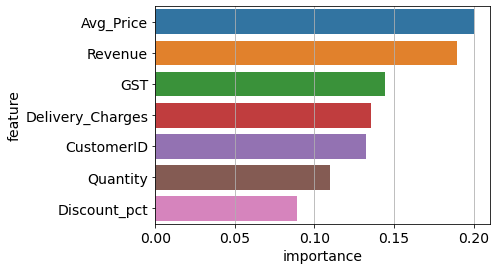

In [220]:
import seaborn as sn

indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )
plt.Figure(figsize=(50,50))

In [221]:
### Tuning parameters

pargrid_ada = {'n_estimators': [50, 60, 70],
                'max_features': [5,6,7]}
gscv_Rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [222]:
gscv_results = gscv_Rf.fit(train_X, train_y)
gscv_results.best_score_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


0.7847166737340148

In [223]:
gscv_results.best_params_

{'max_features': 6, 'n_estimators': 50}

In [224]:
gscv_results.predict(train_X)


array([1, 3, 0, ..., 3, 3, 3])


## Boosting

In [225]:
#### Ada Boosting

pargrid_ada = {'n_estimators': [100, 200, 400],
               'learning_rate': [10 ** x for x in range(-1, 1)]}

In [226]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [227]:
gscv_ada.fit(train_X, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1],
                         'n_estimators': [100, 200, 400]},
             verbose=True)

In [228]:
print ( gscv_ada.best_params_ )

print ( gscv_ada.best_score_ )

{'learning_rate': 1, 'n_estimators': 200}
0.5254893208650435


In [229]:
clf_ada = gscv_ada.best_estimator_

In [230]:
ad=AdaBoostClassifier(learning_rate = 0.1, n_estimators=400)
ad.fit(train_X, train_y )

AdaBoostClassifier(learning_rate=0.1, n_estimators=400)

In [231]:
ad.predict_proba(train_X)

array([[0.24771286, 0.25010778, 0.25456857, 0.24761079],
       [0.27413042, 0.27906066, 0.17344676, 0.27336216],
       [0.27136427, 0.27749943, 0.18380803, 0.26732826],
       ...,
       [0.24955069, 0.24735202, 0.2489301 , 0.2541672 ],
       [0.25088275, 0.24839787, 0.2518689 , 0.24885048],
       [0.24987567, 0.24705417, 0.24907148, 0.25399868]])

In [232]:
train_y

,Custmer_type
108,1
3154,3
123,0
2147,2
1196,1
...,...
1122,0
1346,0
3454,3
3437,3


In [233]:
#Train data - AUC Score
print(metrics.roc_auc_score(train_y, pd.DataFrame(ad.predict_proba(train_X)),multi_class='ovr'))

#Test data - AUC Score
print(metrics.roc_auc_score(test_y, pd.DataFrame(ad.predict_proba(test_X)),multi_class='ovr'))

0.7396838767005955
0.7013315844444596




### Gradient Boost

In [234]:
gscv_gbm = GridSearchCV(estimator=GradientBoostingClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [235]:
gscv_gbm.fit(train_X, train_y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 1],
                         'n_estimators': [100, 200, 400]},
             verbose=True)

In [236]:
#Train data - AUC Score
print(metrics.roc_auc_score(train_y, pd.DataFrame(gscv_gbm.predict_proba(train_X)),multi_class='ovr'))

#Test data - AUC Score
print(metrics.roc_auc_score(test_y, pd.DataFrame(gscv_gbm.predict_proba(test_X)),multi_class='ovr'))

1.0
0.9282669156967358


In [237]:
print ( gscv_gbm.best_params_ )

clf_gbm = gscv_gbm.best_estimator_

print ( gscv_gbm.best_score_ )

{'learning_rate': 1, 'n_estimators': 400}
0.7434351775392237


In [238]:
gbm=GradientBoostingClassifier(learning_rate = 0.1, n_estimators=200)
gbm.fit(train_X, train_y )

GradientBoostingClassifier(n_estimators=200)

In [239]:
#Train data - AUC Score
print(metrics.roc_auc_score(train_y, pd.DataFrame(gscv_gbm.predict_proba(train_X)),multi_class='ovr'))

#Test data - AUC Score
print(metrics.roc_auc_score(test_y, pd.DataFrame(gscv_gbm.predict_proba(test_X)),multi_class='ovr'))

1.0
0.9282669156967358


### XGBOOST

In [240]:
from xgboost import XGBClassifier

#All Columns
xgb_estimator = XGBClassifier(n_estimators=200,
                         random_state = 42,
                        n_jobs=-1,
                        verbose=1)

In [241]:
test_X = test_X[test_X.columns.difference(['pred_prob'])]

xgb_estimator.fit(train_X, train_y)

xgb_estimator.predict(train_X)

[12:33:20] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.



array([1, 3, 0, ..., 3, 3, 3], dtype=int64)

In [242]:
#Train data - AUC Score

print ( metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X)),multi_class='ovr'))

#Test data - AUC Score

print ( metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X)),multi_class='ovr'))

1.0
0.9456070803344748


In [243]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       632
           1       1.00      1.00      1.00       650
           2       1.00      1.00      1.00       665
           3       1.00      1.00      1.00       645

    accuracy                           1.00      2592
   macro avg       1.00      1.00      1.00      2592
weighted avg       1.00      1.00      1.00      2592

              precision    recall  f1-score   support

           0       0.80      0.65      0.72       294
           1       0.73      0.74      0.73       276
           2       0.83      0.92      0.87       261
           3       0.85      0.93      0.89       281

    accuracy                           0.81      1112
   macro avg       0.80      0.81      0.80      1112
weighted avg       0.80      0.81      0.80      1112



In [244]:
# with all tuning parameters

xgb_estimator = XGBClassifier( learning_rate=0.01,
                               n_estimators=1000,
                               max_depth=5,
                               min_child_weight=1,
                               gamma=1,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               n_jobs=-1,
                               reg_alpa=1,
                               scale_pos_weight=1,
                               random_state=42,
                               verbose=1)

In [245]:
xgb_estimator.fit(train_X, train_y)

[12:33:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "reg_alpa", "scale_pos_weight", "verbose" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [246]:
print(metrics.roc_auc_score(train_y,pd.DataFrame(xgb_estimator.predict_proba(train_X)),multi_class='ovr'))

print(metrics.roc_auc_score(test_y,pd.DataFrame(xgb_estimator.predict_proba(test_X)),multi_class='ovr'))

0.9864809395298035
0.9060488499261847


In [247]:
print(metrics.classification_report(train_y, xgb_estimator.predict(train_X)))

print(metrics.classification_report(test_y, xgb_estimator.predict(test_X)))


              precision    recall  f1-score   support

           0       0.93      0.80      0.86       632
           1       0.90      0.83      0.86       650
           2       0.83      0.99      0.91       665
           3       0.91      0.93      0.92       645

    accuracy                           0.89      2592
   macro avg       0.89      0.89      0.89      2592
weighted avg       0.89      0.89      0.89      2592

              precision    recall  f1-score   support

           0       0.75      0.54      0.63       294
           1       0.71      0.64      0.68       276
           2       0.68      0.92      0.78       261
           3       0.79      0.83      0.81       281

    accuracy                           0.73      1112
   macro avg       0.73      0.73      0.72      1112
weighted avg       0.73      0.73      0.72      1112



### 7) Perform Cohort Analysis by defining below cohorts

#### 1) Customer who started in each month and understand their behaviour

In [ ]:
# I need to take only diagonally value .

In [115]:
Ab =pd.merge( Cust_osdc_tax_amt.loc[ : ,['CustomerID','Transaction_ID','Transaction_Date','Month']] , A ,how='left' ,on ='CustomerID')

In [116]:
Ab

,CustomerID,Transaction_ID,Transaction_Date_x,Month_x,Transaction_Date_y,Month_y
0,17850,16679,2019-01-01,1,2019-01-01,1
1,17850,16679,2019-01-01,1,2019-01-01,1
2,17850,16679,2019-01-01,1,2019-01-01,1
3,17850,16679,2019-01-01,1,2019-01-01,1
4,17850,16679,2019-01-01,1,2019-01-01,1
...,...,...,...,...,...,...
630283,16333,47144,2019-12-16,12,2019-12-16,12
630284,16333,47144,2019-12-16,12,2019-12-16,12
630285,16333,47144,2019-12-16,12,2019-12-16,12
630286,16333,47144,2019-12-16,12,2019-12-16,12


In [117]:
Ab.drop(columns='Transaction_Date_y',inplace=True)

In [118]:
Ab.rename(columns={'Month_x':'Month' , 'Month_y':'first_Month' , 'Transaction_Date_x': 'Transaction_Date'} , inplace =True)

In [119]:
Ab

,CustomerID,Transaction_ID,Transaction_Date,Month,first_Month
0,17850,16679,2019-01-01,1,1
1,17850,16679,2019-01-01,1,1
2,17850,16679,2019-01-01,1,1
3,17850,16679,2019-01-01,1,1
4,17850,16679,2019-01-01,1,1
...,...,...,...,...,...
630283,16333,47144,2019-12-16,12,12
630284,16333,47144,2019-12-16,12,12
630285,16333,47144,2019-12-16,12,12
630286,16333,47144,2019-12-16,12,12


In [120]:
Ab.drop_duplicates(inplace=True)

In [134]:
x =(Ab[['CustomerID','Transaction_ID','first_Month']].groupby(['CustomerID','first_Month']).count()).reset_index()
# These are the list of customer with their first_month when they done transaction. It's also include how many transaction they do .

In [135]:
y = Cust_osdc_tax_amt[['CustomerID','Quantity','Avg_Price','Delivery_Charges','GST','Revenue']].groupby('CustomerID').sum().reset_index()

In [130]:
Cust_osdc_tax_amt.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'GST', 'Revenue', 'Gender', 'Location', 'Tenure_Months',
       'day', 'quarter'],
      dtype='object')

In [136]:
z =Cust_osdc_tax_amt[['CustomerID','Gender','Location','Product_Description','Product_Category']].drop_duplicates()

In [138]:
xy = pd.merge( x , y , on = 'CustomerID')

In [140]:
xyz = pd.merge( z , xy , on = 'CustomerID', how = 'left' )

In [142]:
xyz.rename(columns = { 'Transaction_ID':'No_of_time_ordered','Quantity':'Total_qnty'},inplace=True)

In [144]:
xyz.sort_values( by = 'Total_qnty', ascending= False)
# Here we can see that max. qnty ordered is 57372 & it's by CustomerID = 12748 .
# Max. qnty ordered from Chicago location & ordered by Female Gender & it's lifestyle related product-category.
# yoga Mat Blue is ordered max. in terms of qnty .

,CustomerID,Gender,Location,Product_Description,Product_Category,first_Month,No_of_time_ordered,Total_qnty,Avg_Price,Delivery_Charges,GST,Revenue
3702,12748,F,Chicago,Yoga Mat Blue,Lifestyle,1,327,57372,370900.32,95998.08,1177.80,996176.44320
3732,12748,F,Chicago,SPF-15 Slim & Slender Lip Balm,Housewares,1,327,57372,370900.32,95998.08,1177.80,996176.44320
3599,12748,F,Chicago,YouTube Women's Short Sleeve Hero Tee Charcoal,Apparel,1,327,57372,370900.32,95998.08,1177.80,996176.44320
3598,12748,F,Chicago,YouTube Twill Cap,Apparel,1,327,57372,370900.32,95998.08,1177.80,996176.44320
3597,12748,F,Chicago,YouTube Men's Vintage Tee,Apparel,1,327,57372,370900.32,95998.08,1177.80,996176.44320
...,...,...,...,...,...,...,...,...,...,...,...,...
33177,14090,F,California,Google Men's Short Sleeve Performance Badge Te...,Apparel,9,1,12,158.40,72.00,2.16,258.91200
33072,13953,F,Chicago,Android Men's Vintage Henley,Apparel,7,1,12,86.40,72.00,2.16,173.95200
33068,14119,M,California,Google Youth Short Sleeve Tee Red,Apparel,7,1,12,182.28,72.00,2.16,287.09040
33050,17633,F,Chicago,Google Men's Bayside Graphic Tee,Apparel,6,1,12,191.88,72.00,2.16,253.13472


In [145]:
xyz.sort_values( by = 'Revenue', ascending= False)
# In terms of revenue we can see this result .
# It's from Chicago from where we are getting max. revenue & It's Jacket in black .

,CustomerID,Gender,Location,Product_Description,Product_Category,first_Month,No_of_time_ordered,Total_qnty,Avg_Price,Delivery_Charges,GST,Revenue
241,15311,F,Chicago,Google Men's Lightweight Microfleece Jacket Black,Apparel,1,291,49272,355302.84,57755.52,952.32,1.024568e+06
264,15311,F,Chicago,Google Men's Vintage Badge Tee Black,Apparel,1,291,49272,355302.84,57755.52,952.32,1.024568e+06
272,15311,F,Chicago,Google Infant Short Sleeve Tee White,Apparel,1,291,49272,355302.84,57755.52,952.32,1.024568e+06
271,15311,F,Chicago,Google Infant Zip Hood Royal Blue,Apparel,1,291,49272,355302.84,57755.52,952.32,1.024568e+06
270,15311,F,Chicago,Google Women's Yoga Jacket Black,Apparel,1,291,49272,355302.84,57755.52,952.32,1.024568e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
32532,15468,F,Chicago,Google Laptop and Cell Phone Stickers,Office,5,1,12,35.88,72.00,1.20,1.035744e+02
32778,16593,F,Chicago,Badge Holder,Office,9,1,12,19.08,78.00,1.20,9.898800e+01
33240,13748,F,California,7&quot; Dog Frisbee,Lifestyle,1,1,12,14.88,78.00,2.16,9.555840e+01
32484,12875,F,New Jersey,Keyboard DOT Sticker,Office,5,1,12,14.40,72.00,1.20,8.784000e+01


In [146]:
xyz.sort_values( by = 'Delivery_Charges', ascending= False)
# In terms of Delivery_Charges we can see this result .
# It's from New York we are charging more for delivery . we need to look here what we can do here so that Delivery_Charges will be minimum .
# Didn't depend on which product you are delivering , the charges is approximately same ..

,CustomerID,Gender,Location,Product_Description,Product_Category,first_Month,No_of_time_ordered,Total_qnty,Avg_Price,Delivery_Charges,GST,Revenue
32839,12935,F,New York,Google 22 oz Water Bottle,Drinkware,10,2,564,6594.12,97355.88,54.24,108379.5168
32832,12935,F,New York,Google Women's Long Sleeve Tee Lavender,Apparel,10,2,564,6594.12,97355.88,54.24,108379.5168
32845,12935,F,New York,Emoji Sticker Sheet,Accessories,10,2,564,6594.12,97355.88,54.24,108379.5168
32844,12935,F,New York,Google Kick Ball,Lifestyle,10,2,564,6594.12,97355.88,54.24,108379.5168
32843,12935,F,New York,Windup Android,Lifestyle,10,2,564,6594.12,97355.88,54.24,108379.5168
...,...,...,...,...,...,...,...,...,...,...,...,...
33215,15885,F,California,Google Tee Blue,Apparel,12,1,12,268.92,72.00,2.16,389.3256
33068,14119,M,California,Google Youth Short Sleeve Tee Red,Apparel,7,1,12,182.28,72.00,2.16,287.0904
22754,15562,F,New York,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,7,1,12,948.00,72.00,1.20,1114.8000
33232,18141,M,California,Google 17oz Stainless Steel Sport Bottle,Drinkware,5,1,24,182.28,72.00,2.16,502.1808


#### 2) Which Month cohort has maximum retention .

In [52]:
Ab =pd.merge( Cust_osdc_tax_amt.loc[ : ,['CustomerID','Transaction_ID','Transaction_Date','Month']] , A ,how='left' ,on ='CustomerID')

In [53]:
Ab

,CustomerID,Transaction_ID,Transaction_Date_x,Month_x,Transaction_Date_y,Month_y
0,17850,16679,2019-01-01,1,2019-01-01,1
1,17850,16679,2019-01-01,1,2019-01-01,1
2,17850,16679,2019-01-01,1,2019-01-01,1
3,17850,16679,2019-01-01,1,2019-01-01,1
4,17850,16679,2019-01-01,1,2019-01-01,1
...,...,...,...,...,...,...
630283,16333,47144,2019-12-16,12,2019-12-16,12
630284,16333,47144,2019-12-16,12,2019-12-16,12
630285,16333,47144,2019-12-16,12,2019-12-16,12
630286,16333,47144,2019-12-16,12,2019-12-16,12


In [54]:
Ab.drop(columns='Transaction_Date_y',inplace=True)

In [55]:
Ab.rename(columns={'Month_x':'Month' , 'Month_y':'first_Month'} , inplace =True)

In [56]:
Ab

,CustomerID,Transaction_ID,Transaction_Date_x,Month,first_Month
0,17850,16679,2019-01-01,1,1
1,17850,16679,2019-01-01,1,1
2,17850,16679,2019-01-01,1,1
3,17850,16679,2019-01-01,1,1
4,17850,16679,2019-01-01,1,1
...,...,...,...,...,...
630283,16333,47144,2019-12-16,12,12
630284,16333,47144,2019-12-16,12,12
630285,16333,47144,2019-12-16,12,12
630286,16333,47144,2019-12-16,12,12


In [57]:
Ab.drop_duplicates(inplace=True)

In [58]:
# Final Answer :
Ab.pivot_table( index = 'Month', columns = 'first_Month', values = 'CustomerID', aggfunc = 'count' )

first_Month,1,2,3,4,5,6,7,8,9,10,11,12
Month,,,,,,,,,,,,
1,2225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,218.0,1494.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,294.0,60.0,1757.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,359.0,85.0,167.0,1345.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,216.0,157.0,237.0,123.0,1411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,363.0,145.0,169.0,127.0,57.0,1223.0,NaN,NaN,NaN,NaN,NaN,NaN
7,411.0,274.0,267.0,188.0,89.0,88.0,946.0,NaN,NaN,NaN,NaN,NaN
8,342.0,162.0,354.0,127.0,106.0,93.0,110.0,1343.0,NaN,NaN,NaN,NaN
9,244.0,221.0,273.0,166.0,92.0,104.0,33.0,60.0,859.0,NaN,NaN,NaN


In [ ]:
# By this pivot Table we can say that max. retention is in december that is 461 .
